In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [41]:
# Data Processing
import pandas as pd
import numpy as np
import re
import time

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

# Model Evaluation
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

# Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Statistics
from scipy.stats import randint

# Dimensionality Reduction & Clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.metrics import classification_report


In [3]:
# Dataset selection
df = pd.read_csv("/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_no_nans.csv")

# **Examining The Dataset**

In [4]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [6]:
df.dtypes

State                         object
Sex                           object
GeneralHealth                 object
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime               object
PhysicalActivities            object
SleepHours                   float64
RemovedTeeth                  object
HadHeartAttack                object
HadAngina                     object
HadStroke                     object
HadAsthma                     object
HadSkinCancer                 object
HadCOPD                       object
HadDepressiveDisorder         object
HadKidneyDisease              object
HadArthritis                  object
HadDiabetes                   object
DeafOrHardOfHearing           object
BlindOrVisionDifficulty       object
DifficultyConcentrating       object
DifficultyWalking             object
DifficultyDressingBathing     object
DifficultyErrands             object
SmokerStatus                  object
ECigaretteUsage               object
C

In [7]:
df.isnull().sum().sort_values(ascending=False)

State                        0
Sex                          0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI                          0
AlcoholDrinkers              0
HIVTesting                   0
FluVaxLast12                 0
PneumoVaxEver                0
TetanusLast10Tdap            0
HighRiskLastYear             0
DifficultyConcentrating      0
BlindOrVisionDifficulty      0
DeafOrHardOfHearing          0
HadHeartAttack               0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadAngina                    0
HadDiabetes                  0
HadStrok

The duplicated method is used to identify and optionally remove duplicate rows in a dataset. This helps ensure data quality and prevents skewed analysis or model training due to repeated entries.


In [8]:
df.duplicated().sum()

9

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

In [12]:
# Unique values
df.nunique().sort_values()

DeafOrHardOfHearing             2
BlindOrVisionDifficulty         2
HighRiskLastYear                2
DifficultyDressingBathing       2
HadArthritis                    2
HadKidneyDisease                2
HadDepressiveDisorder           2
HadCOPD                         2
HadSkinCancer                   2
HadAsthma                       2
DifficultyConcentrating         2
HadStroke                       2
HadHeartAttack                  2
DifficultyErrands               2
ChestScan                       2
PhysicalActivities              2
AlcoholDrinkers                 2
HIVTesting                      2
FluVaxLast12                    2
PneumoVaxEver                   2
Sex                             2
HadAngina                       2
DifficultyWalking               2
CovidPos                        3
RemovedTeeth                    4
SmokerStatus                    4
ECigaretteUsage                 4
LastCheckupTime                 4
TetanusLast10Tdap               4
HadDiabetes   

In [13]:
# Distinguishing between numerical and categorical variables
numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
categorical_columns = df.select_dtypes(include="object").columns.tolist()

print("Numerical Variables:", numerical_columns)
print("Categorical Variables:", categorical_columns)

Numerical Variables: ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']
Categorical Variables: ['State', 'Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']


# Data Visualization

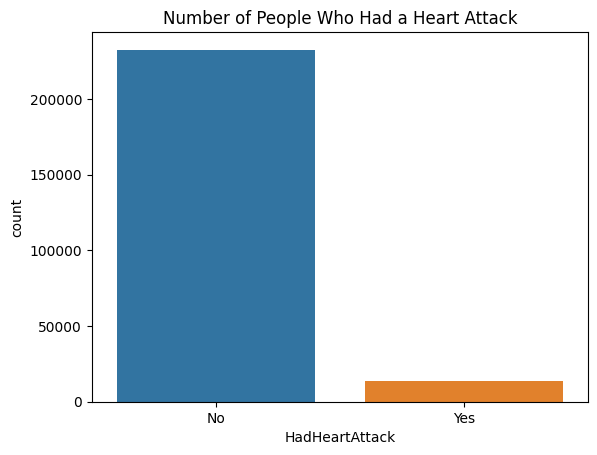

HadHeartAttack
No     0.945389
Yes    0.054611
Name: proportion, dtype: float64

In [14]:
# Visualizing the number of people who had a heart attack
sns.countplot(data=df, x="HadHeartAttack")
plt.title("Number of People Who Had a Heart Attack")
plt.show()

# Displaying the proportion of heart attack cases
df["HadHeartAttack"].value_counts(normalize=True)

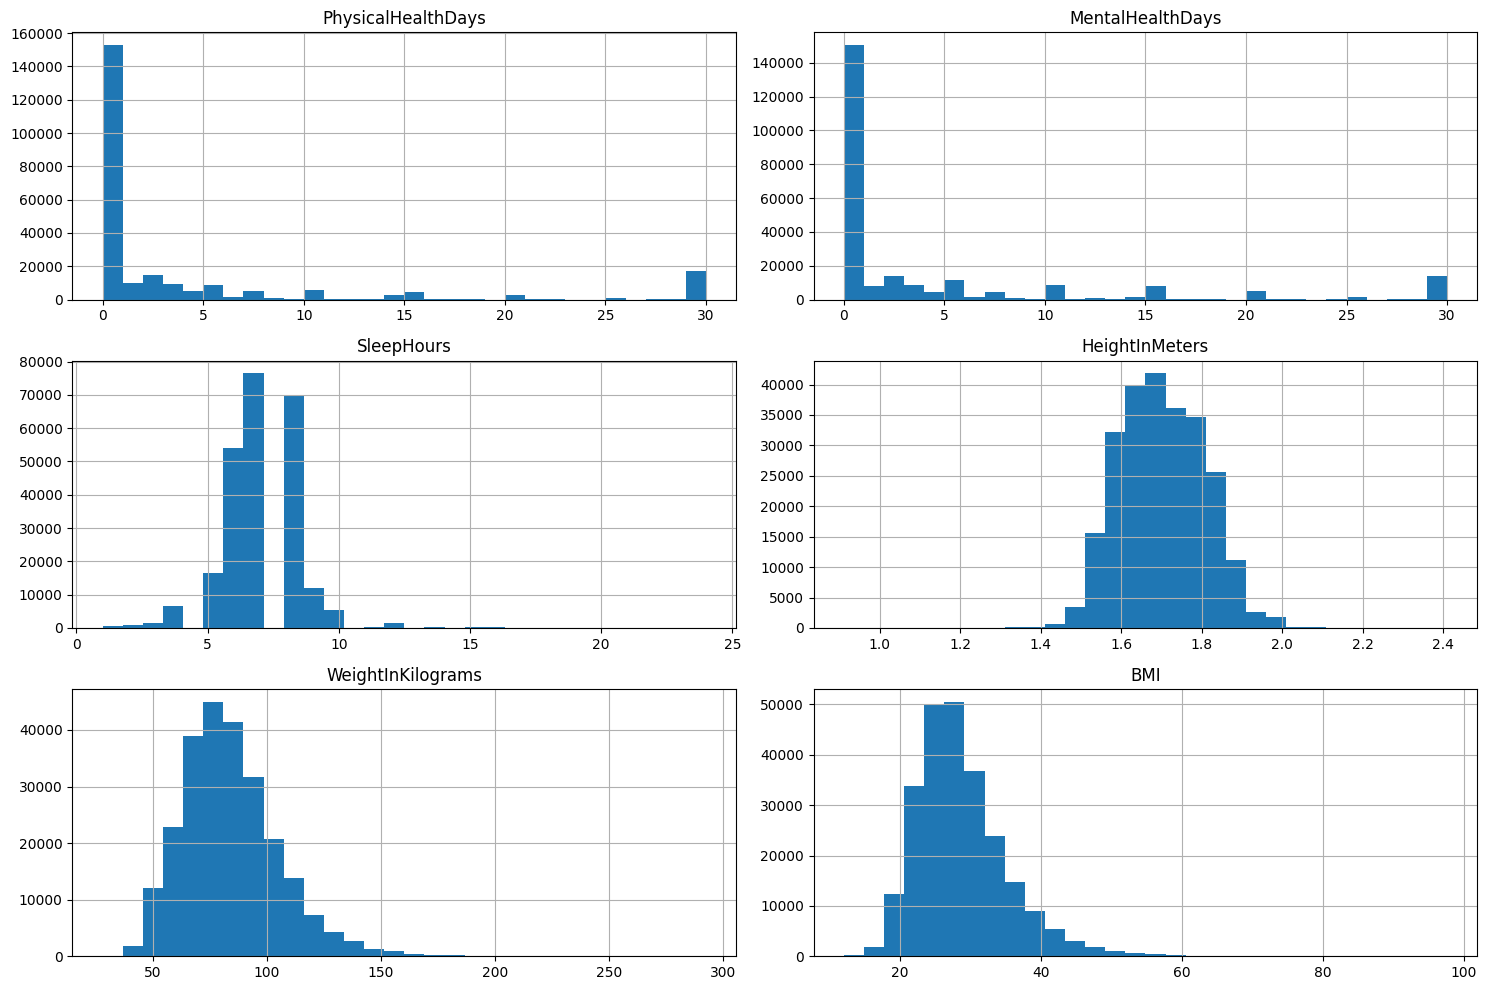

In [15]:
df[numerical_columns].hist(figsize=(15,10), bins=30)
plt.tight_layout()
plt.show()

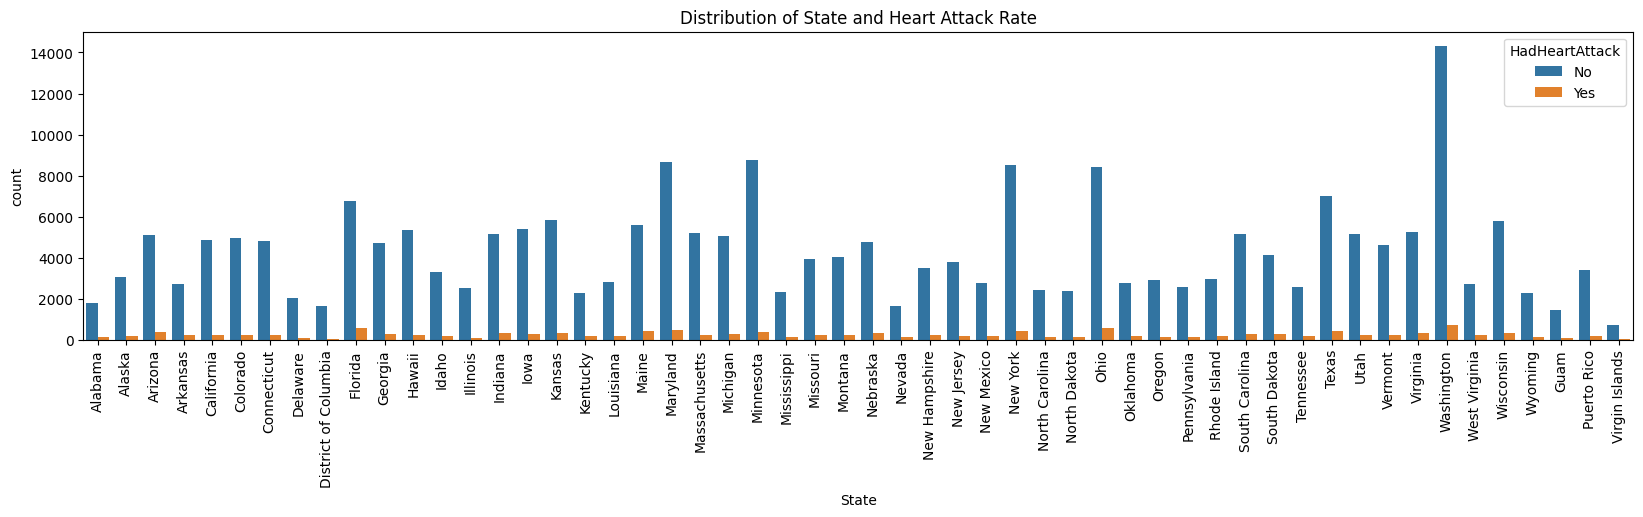

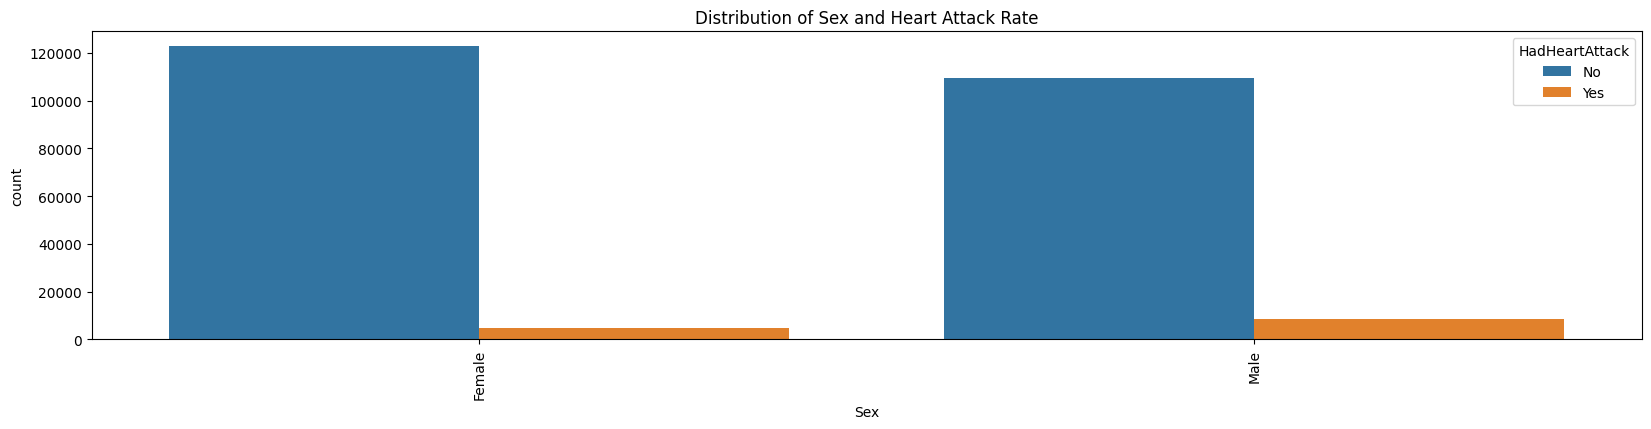

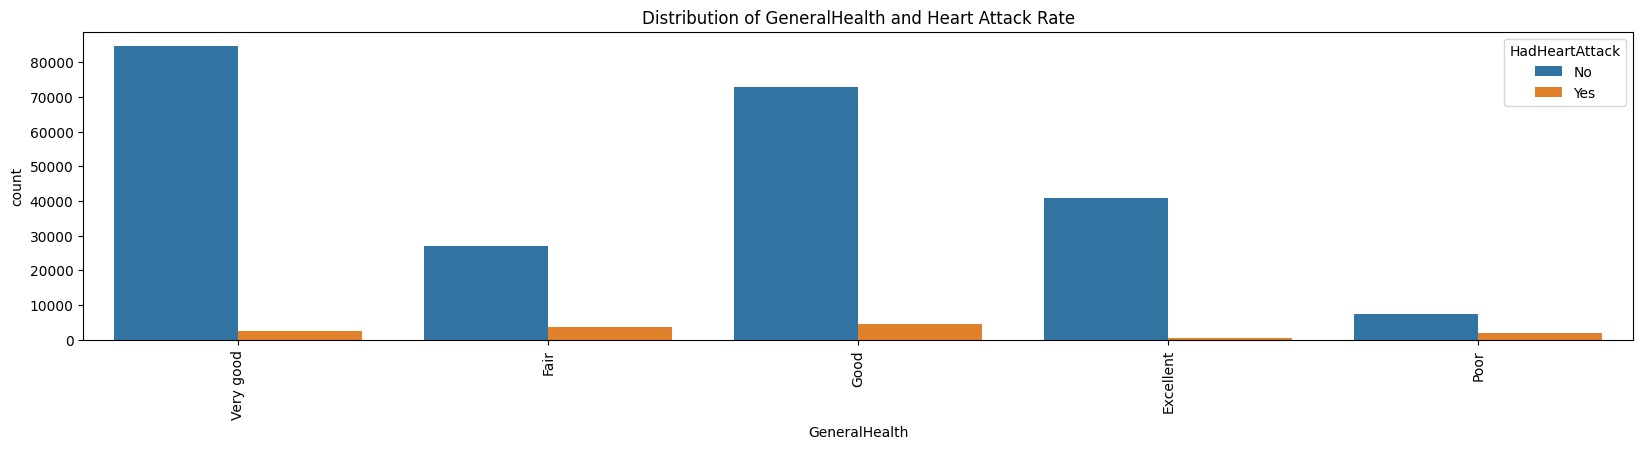

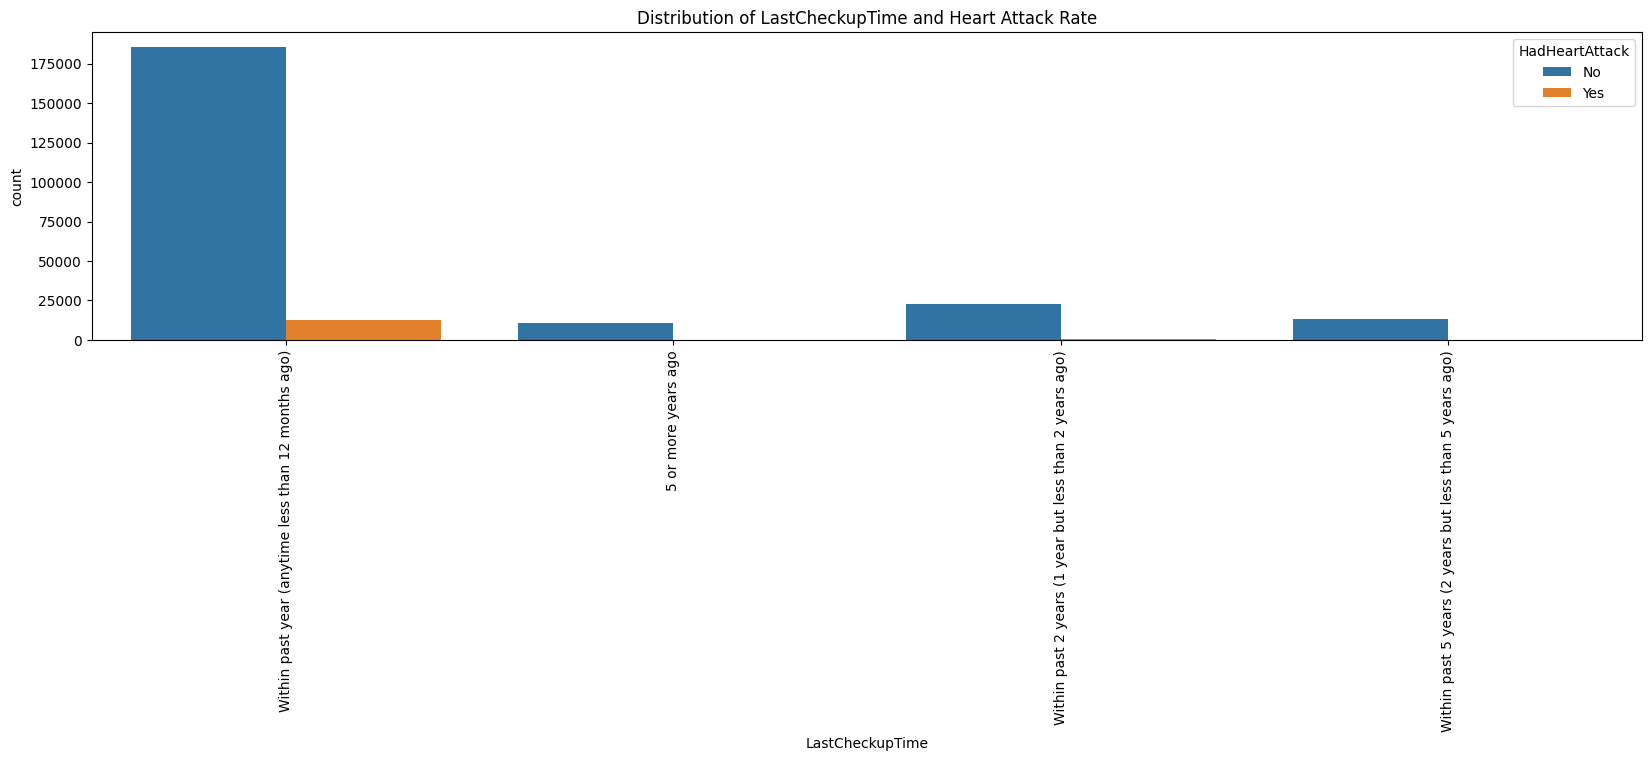

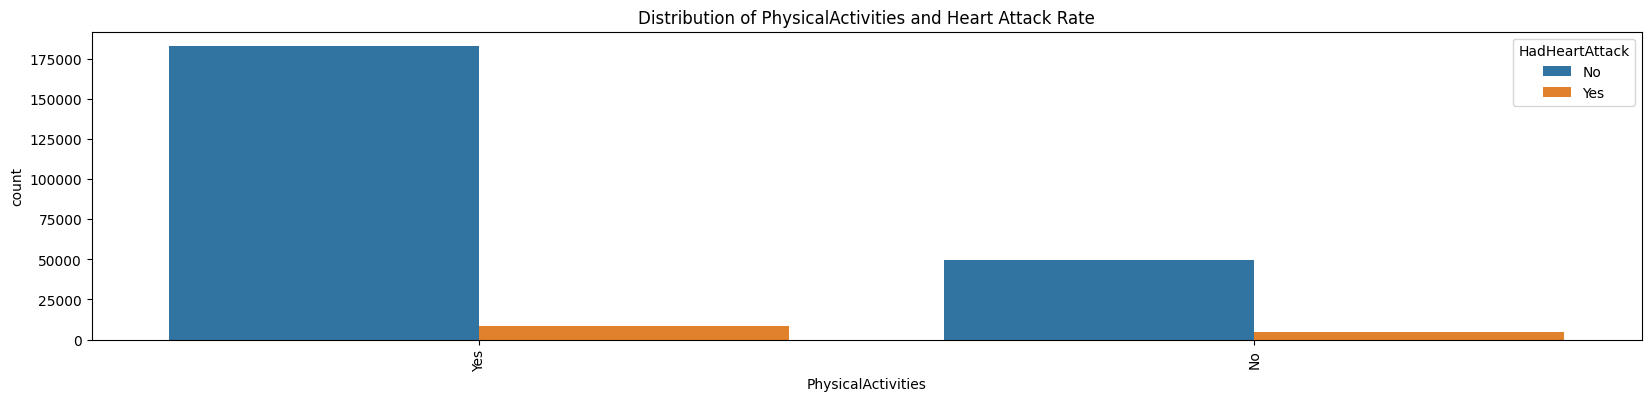

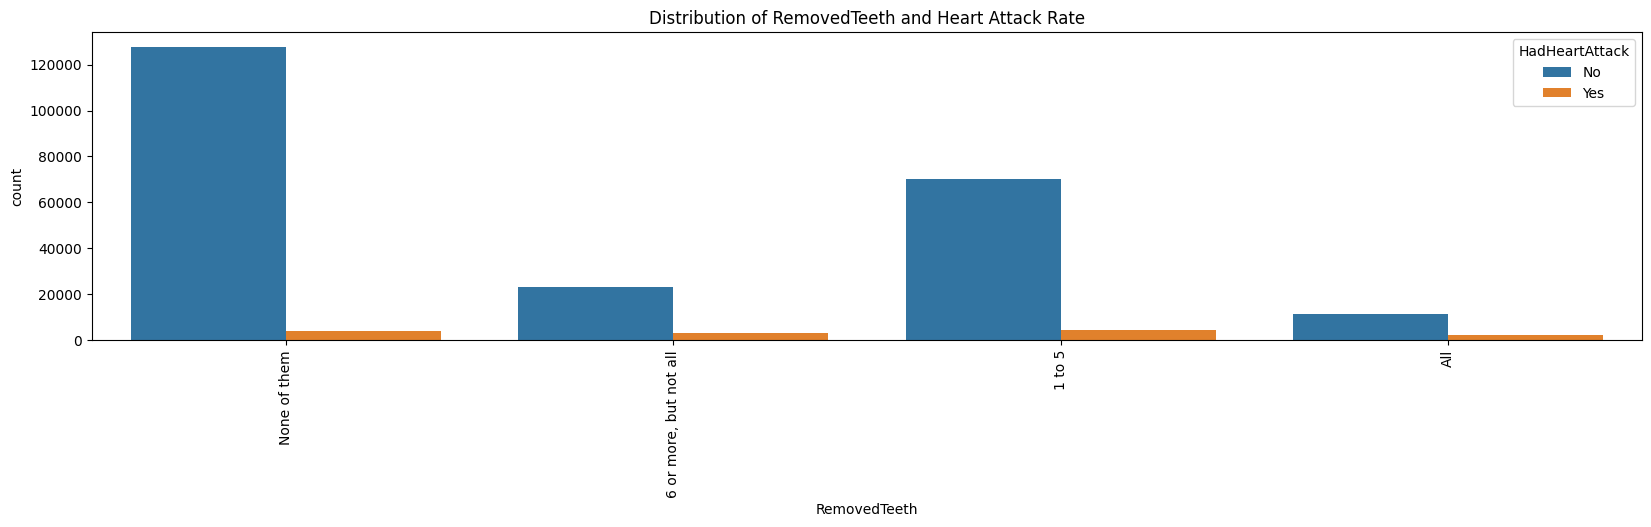

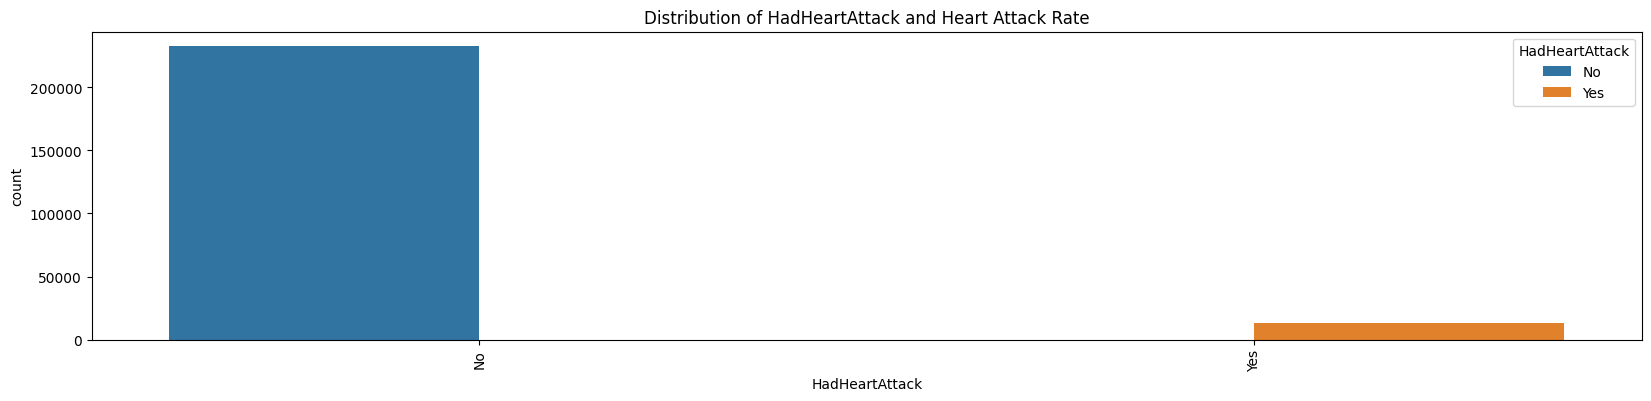

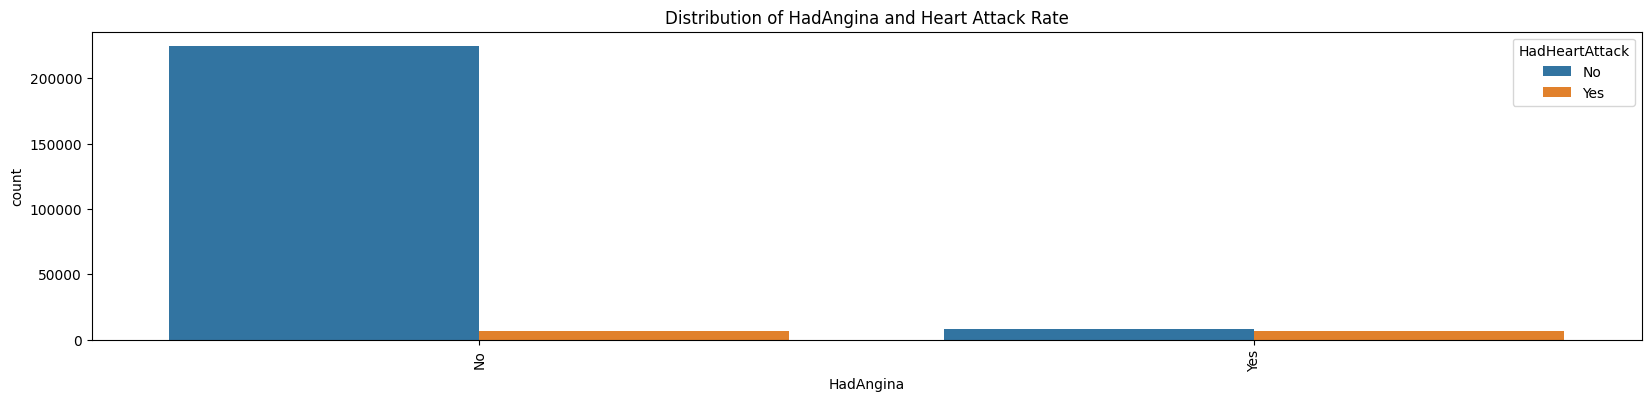

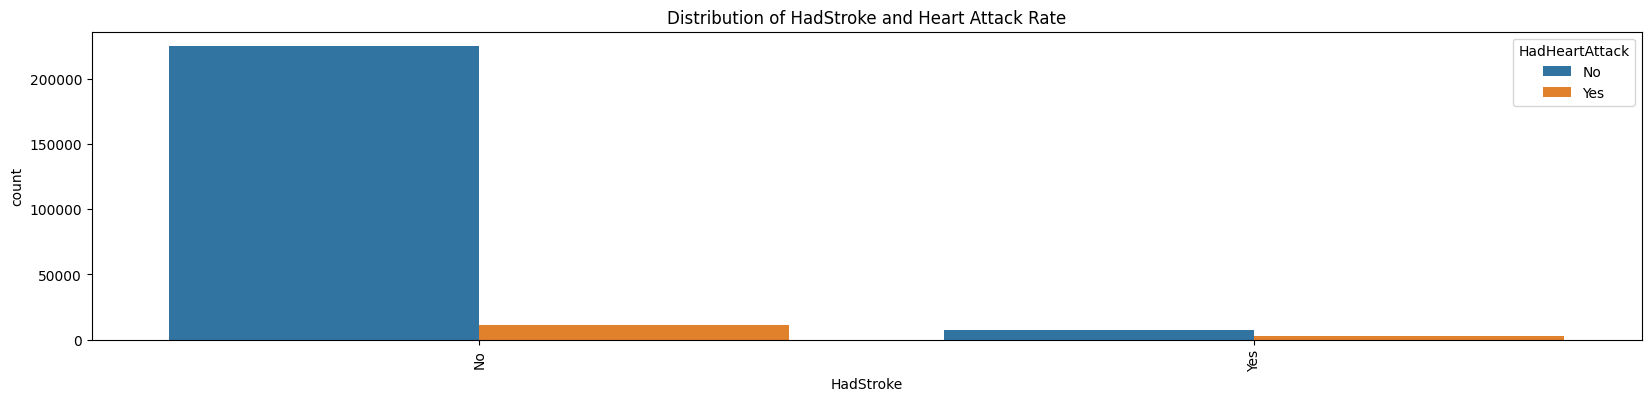

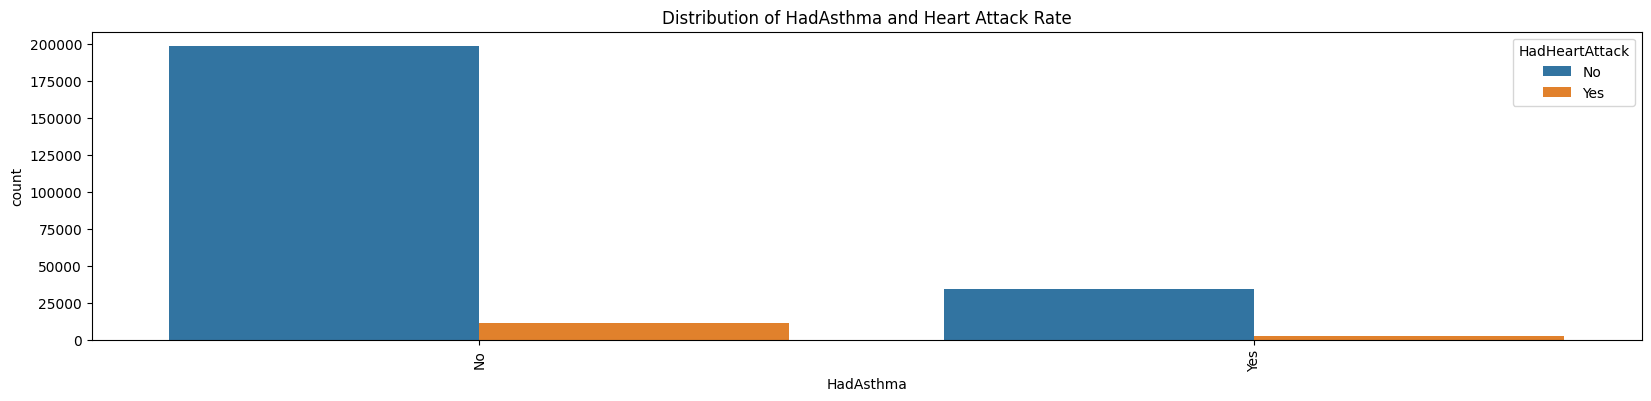

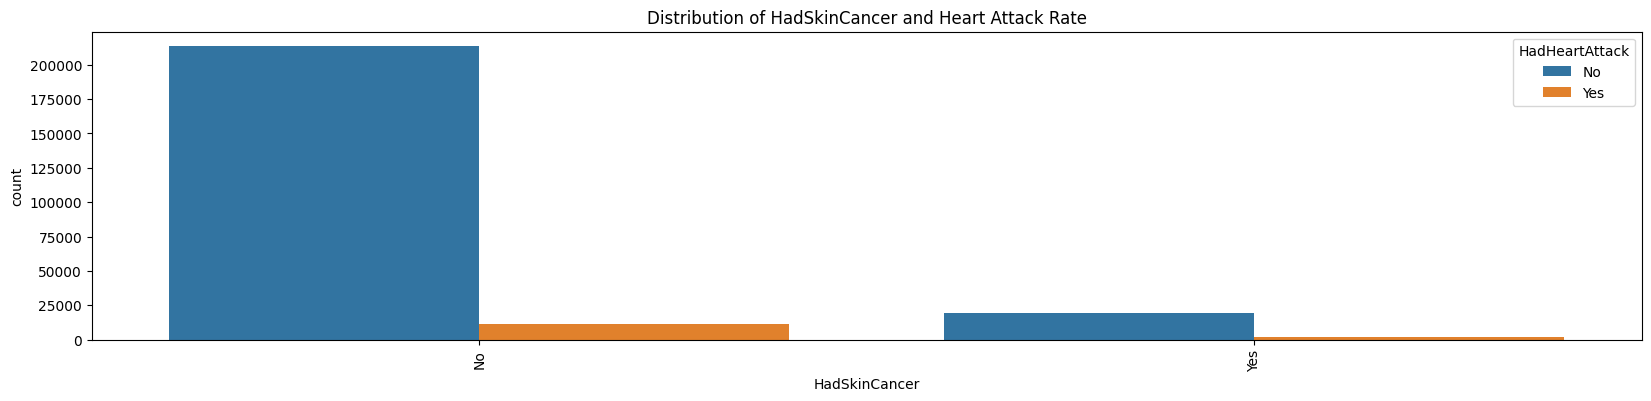

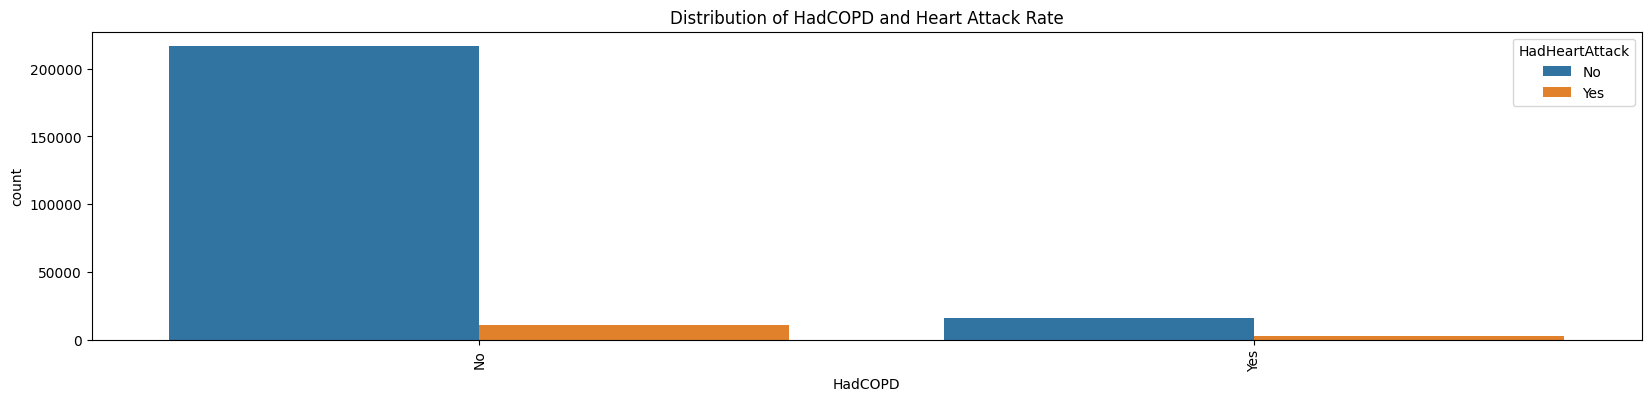

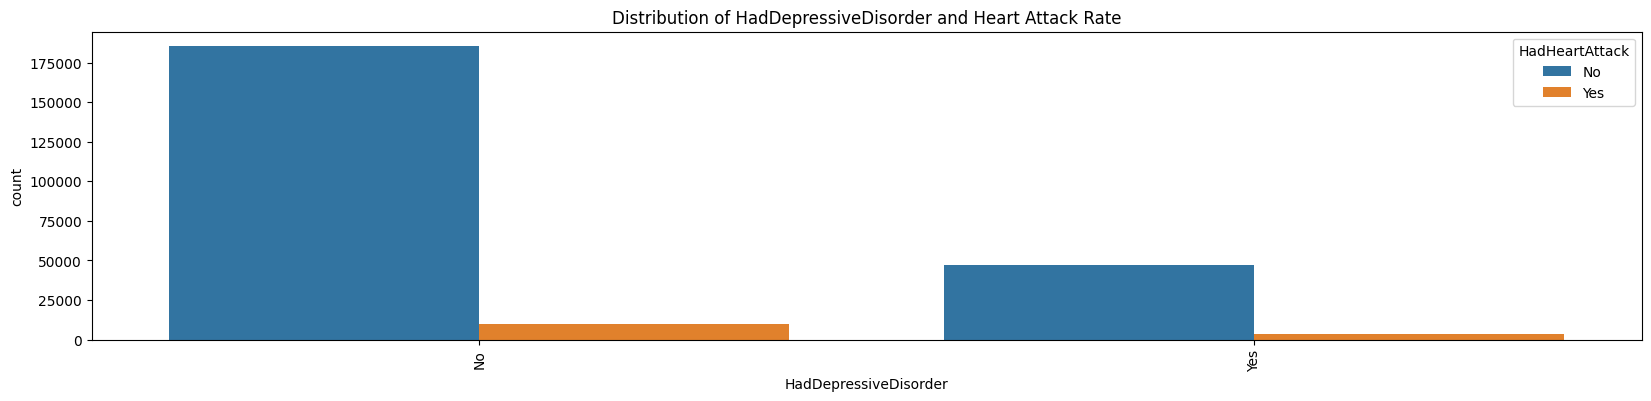

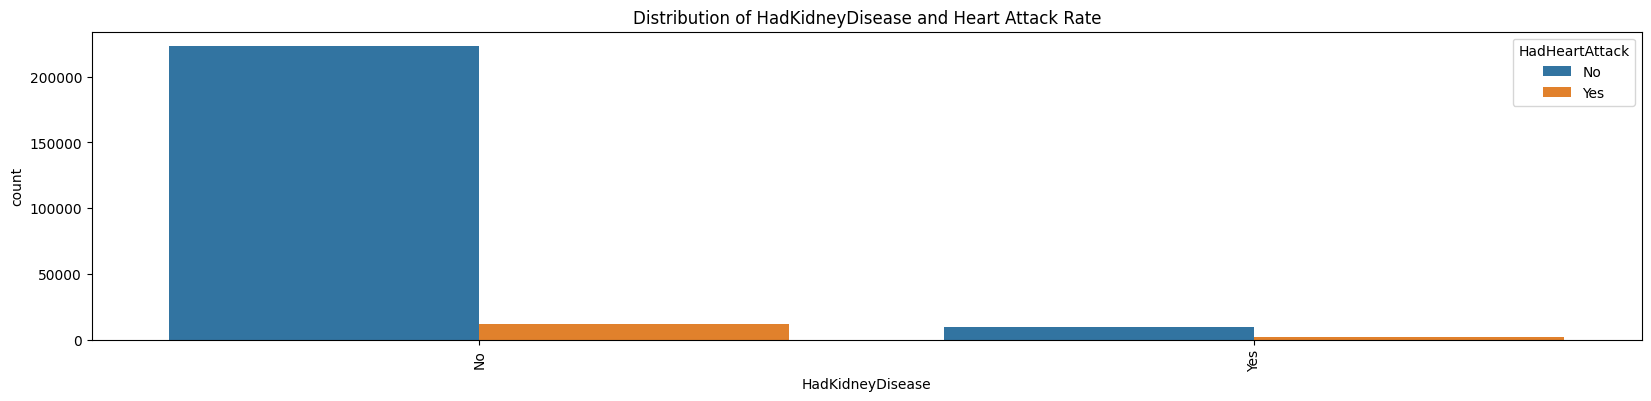

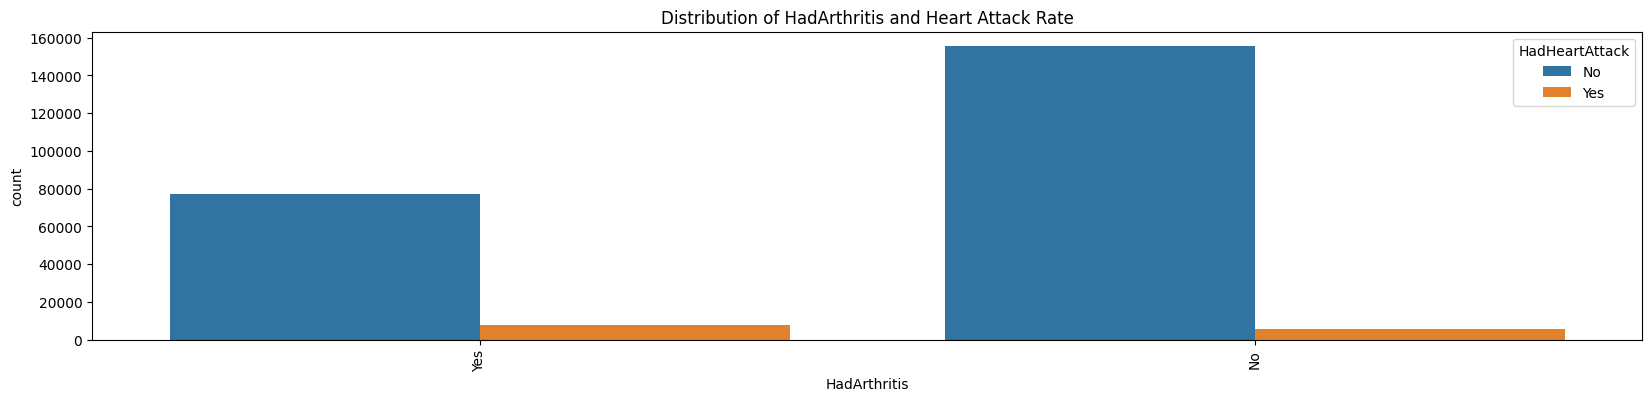

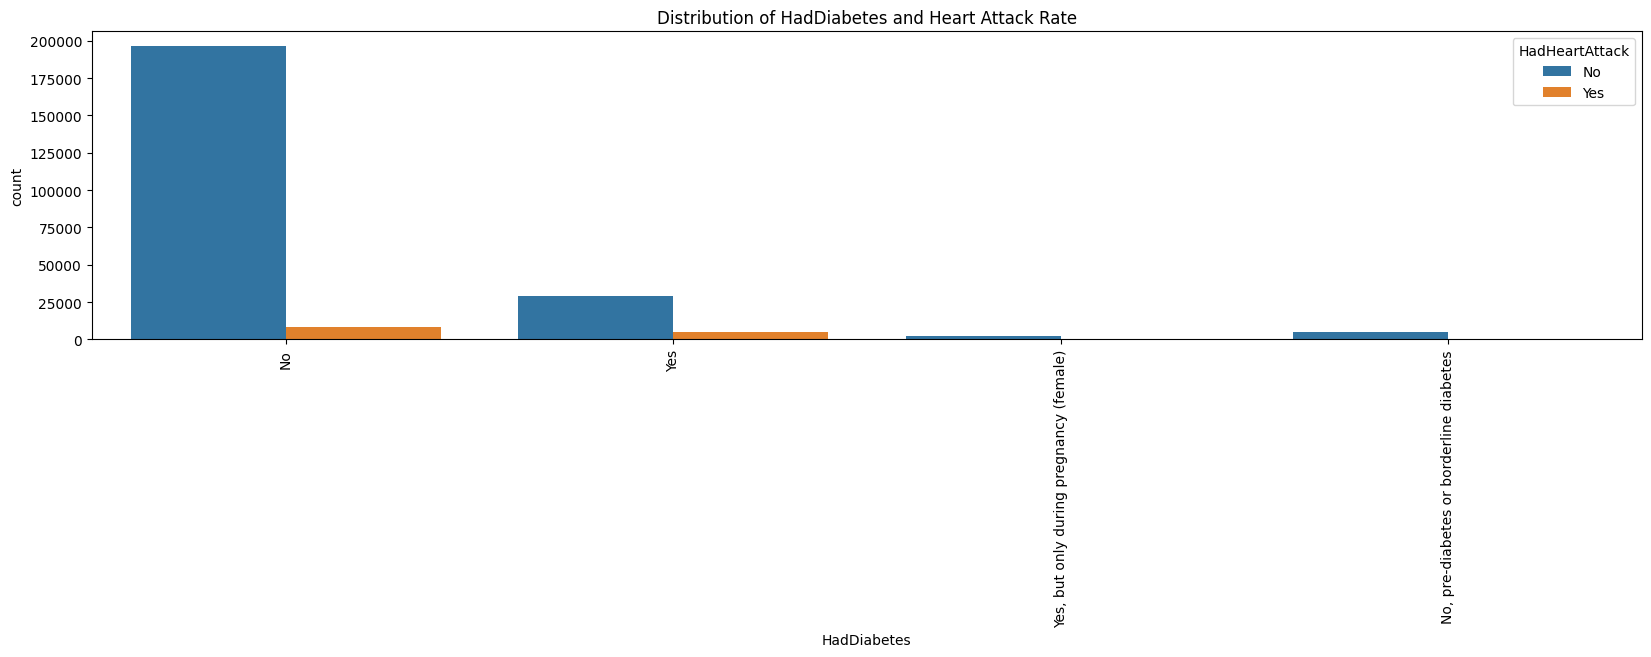

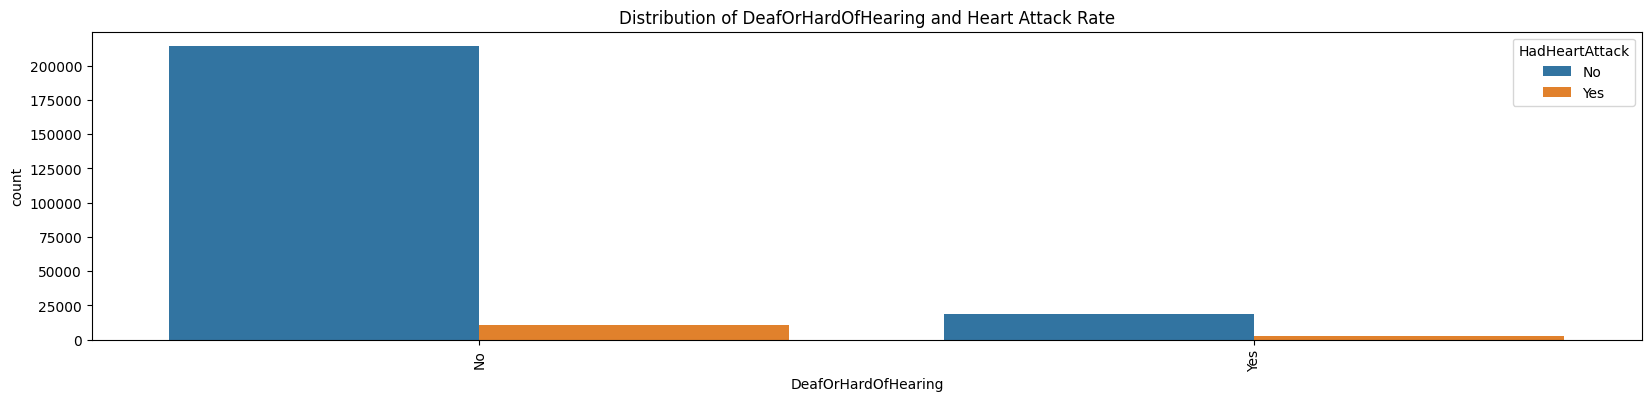

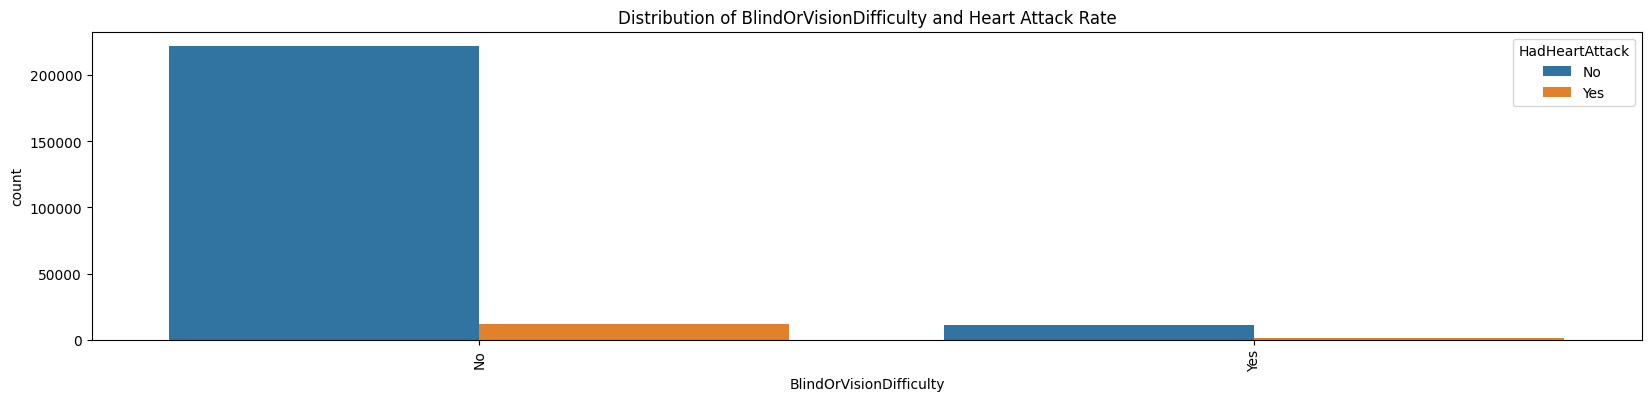

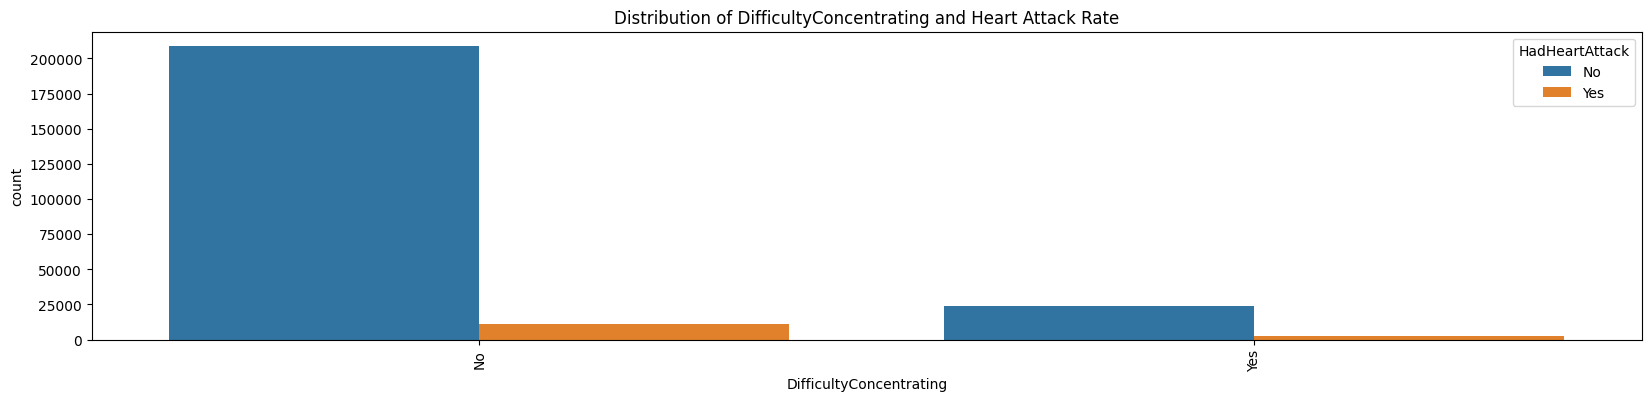

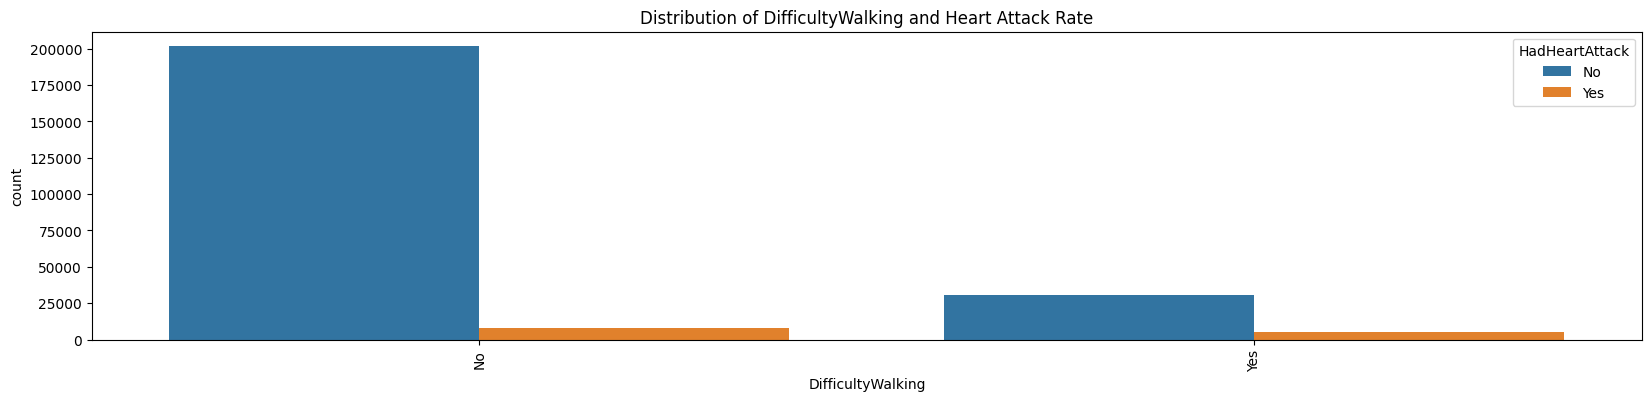

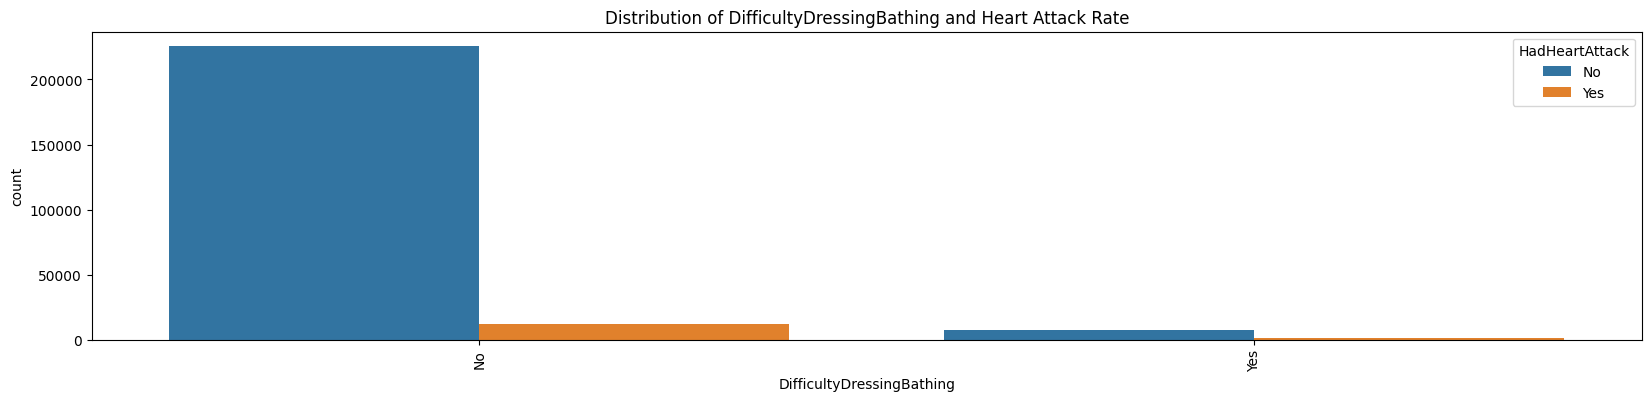

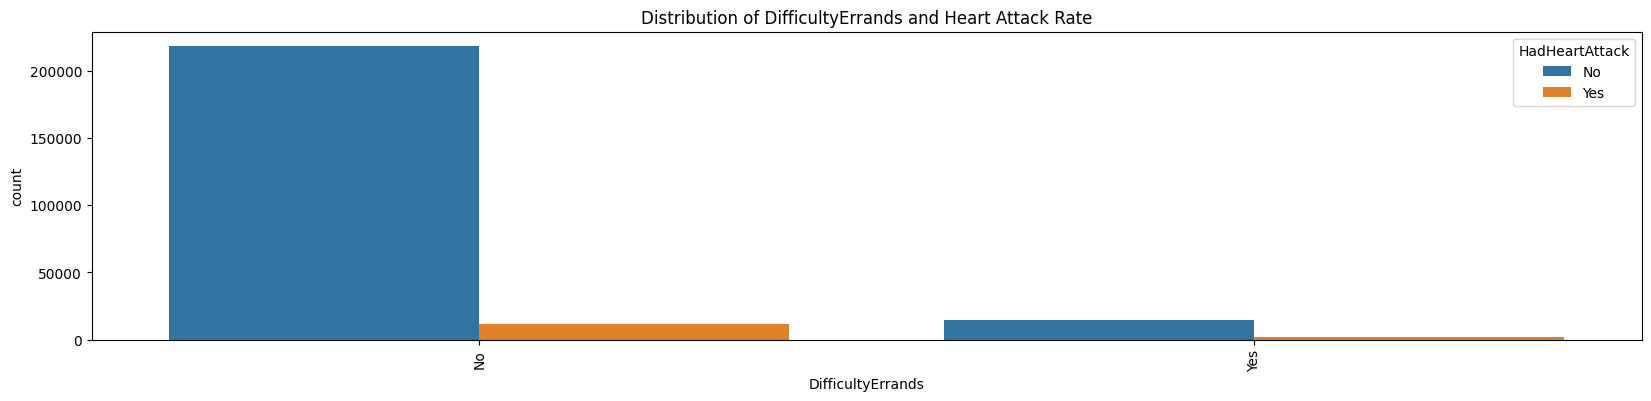

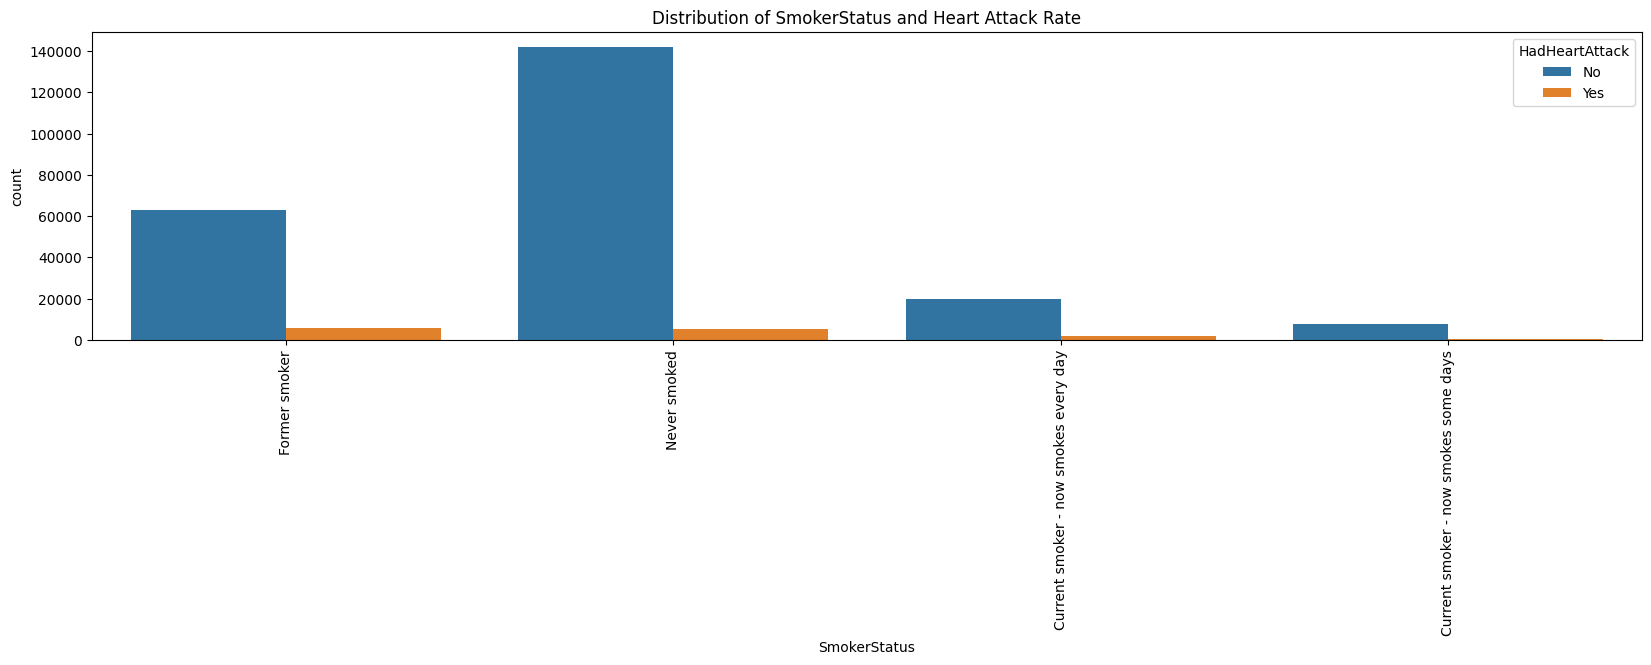

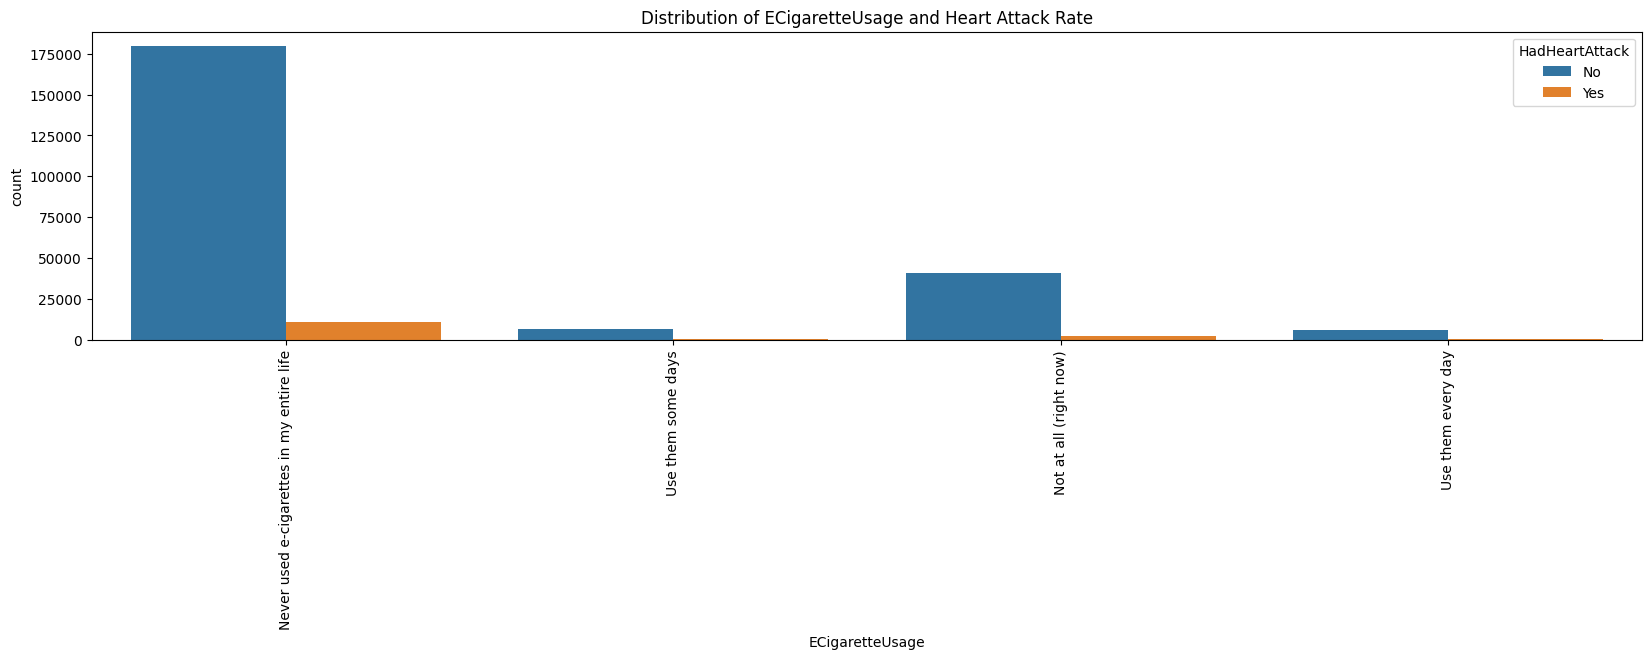

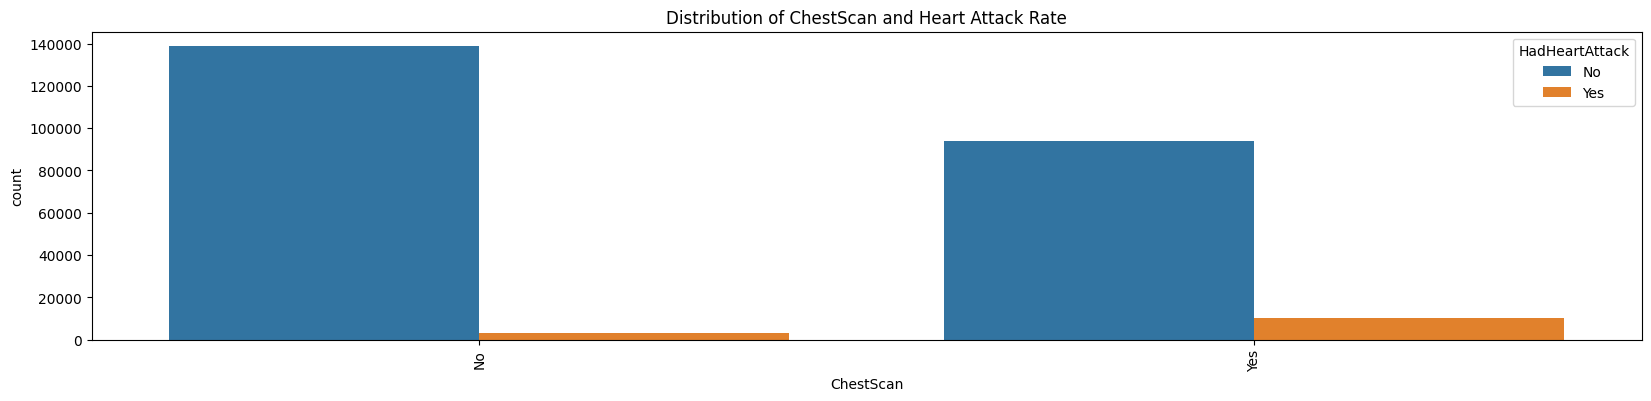

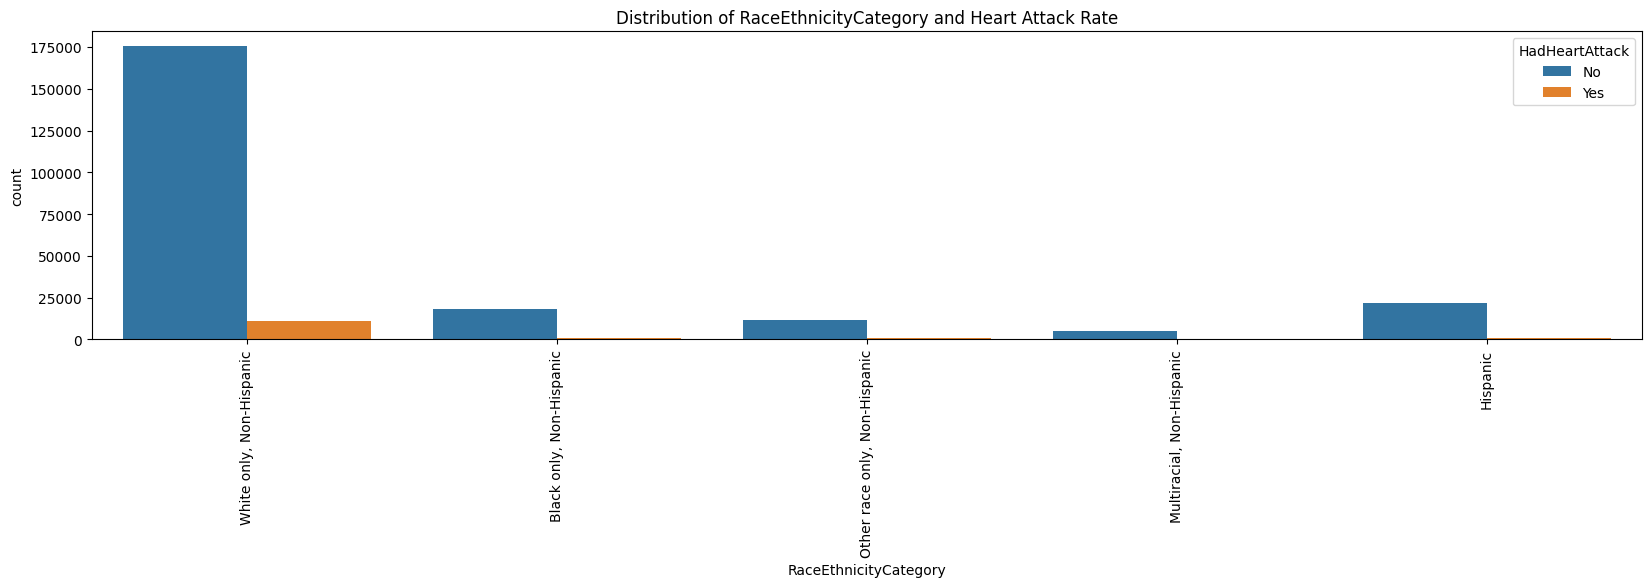

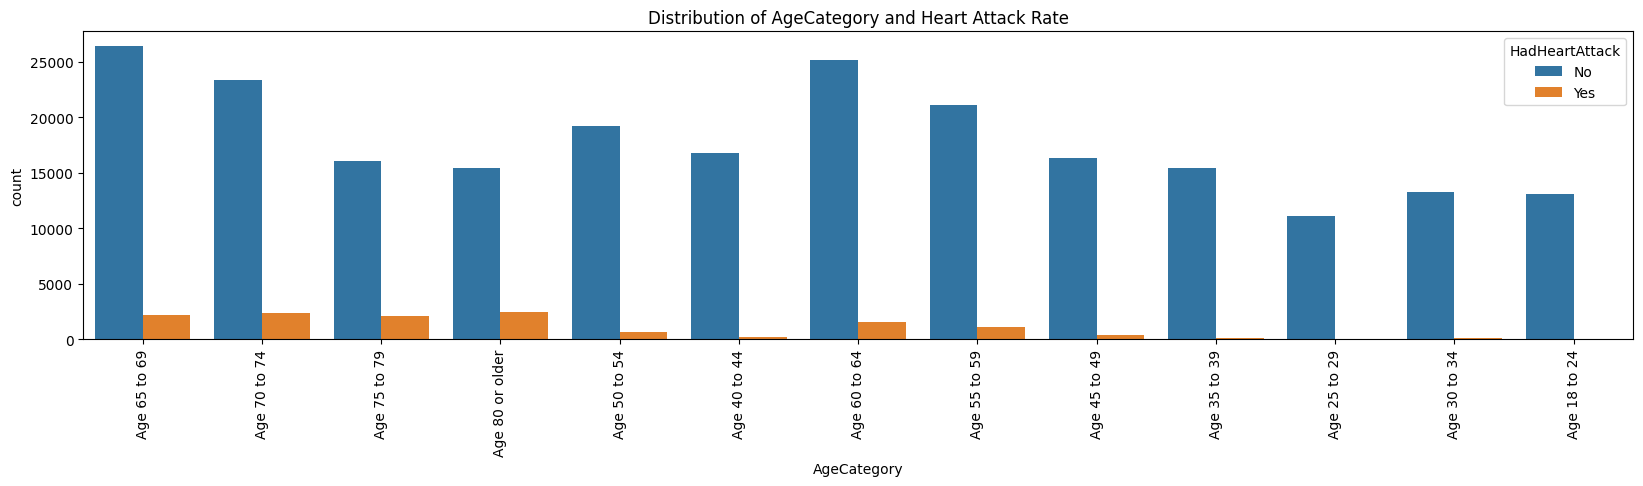

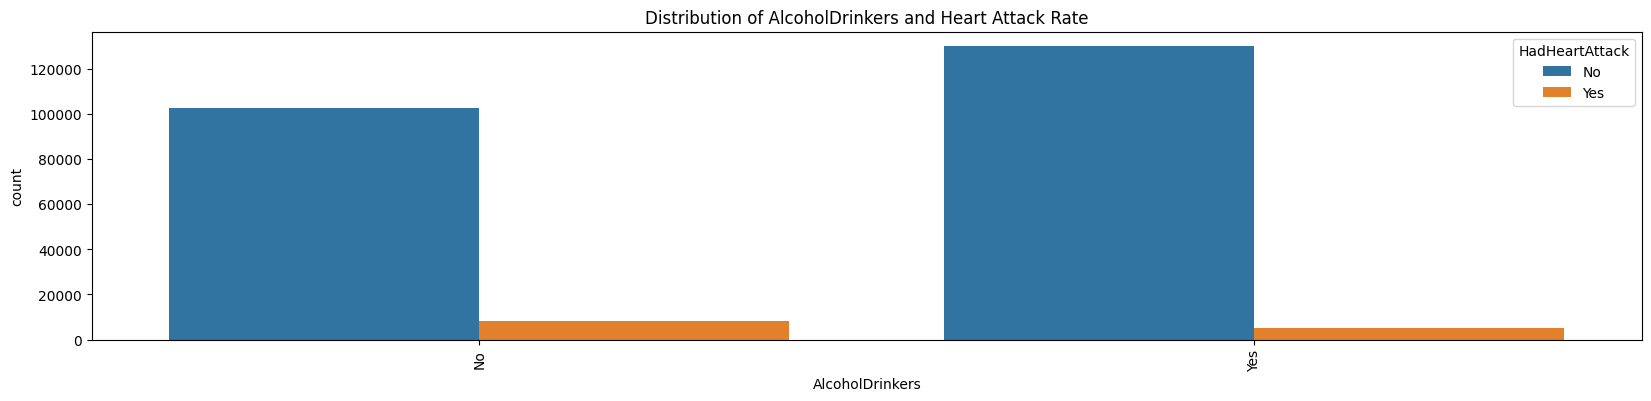

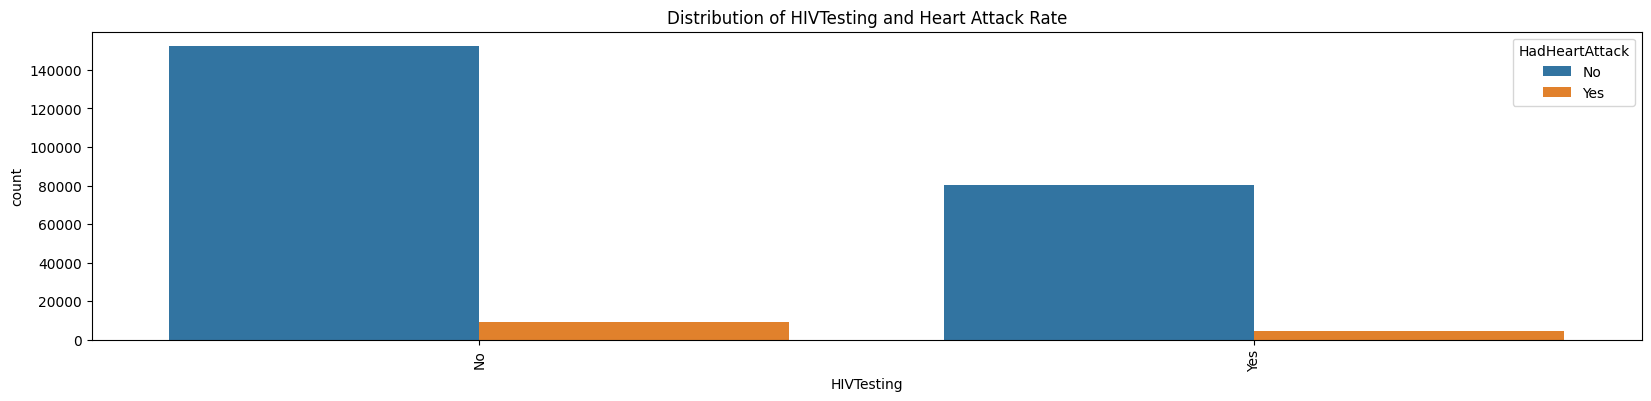

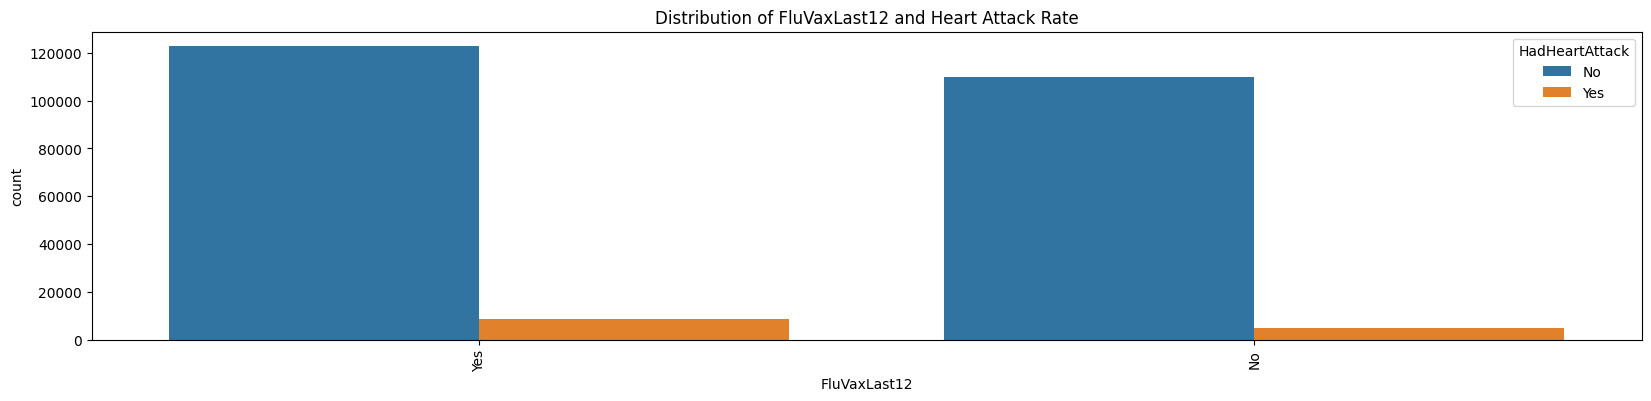

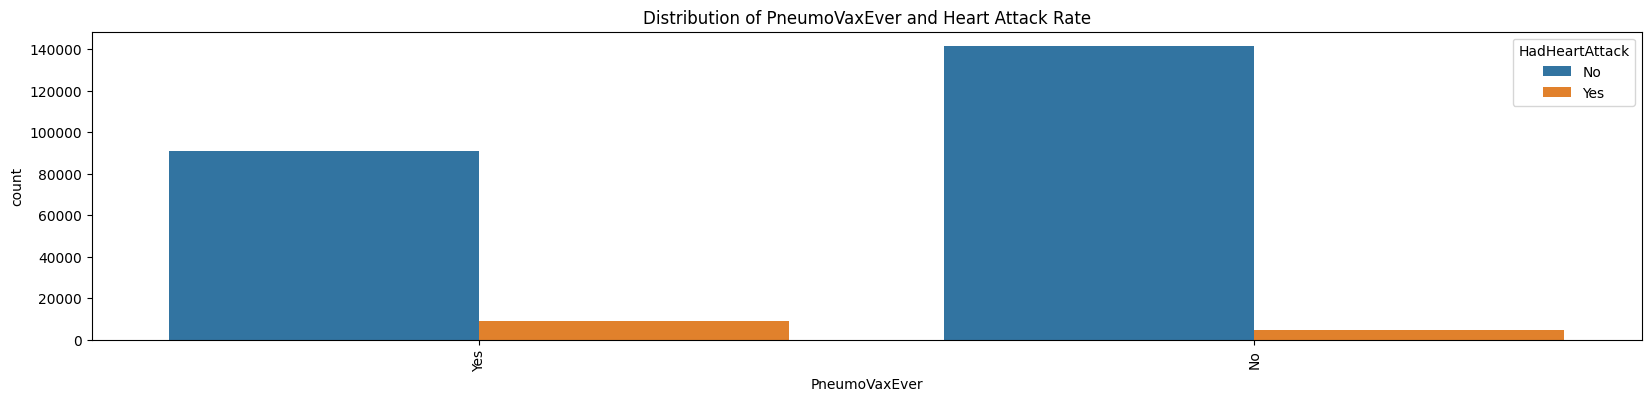

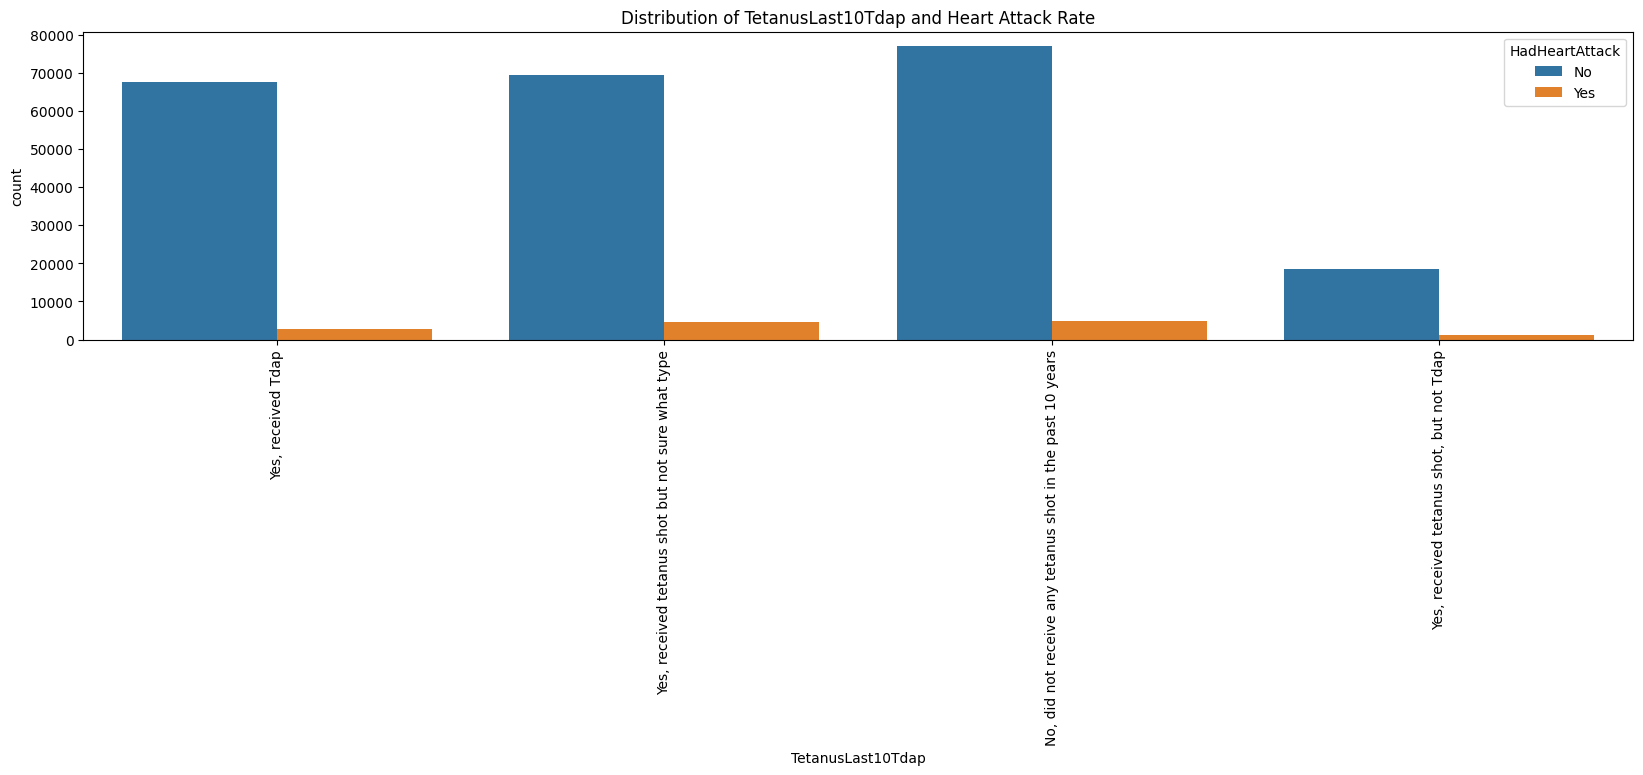

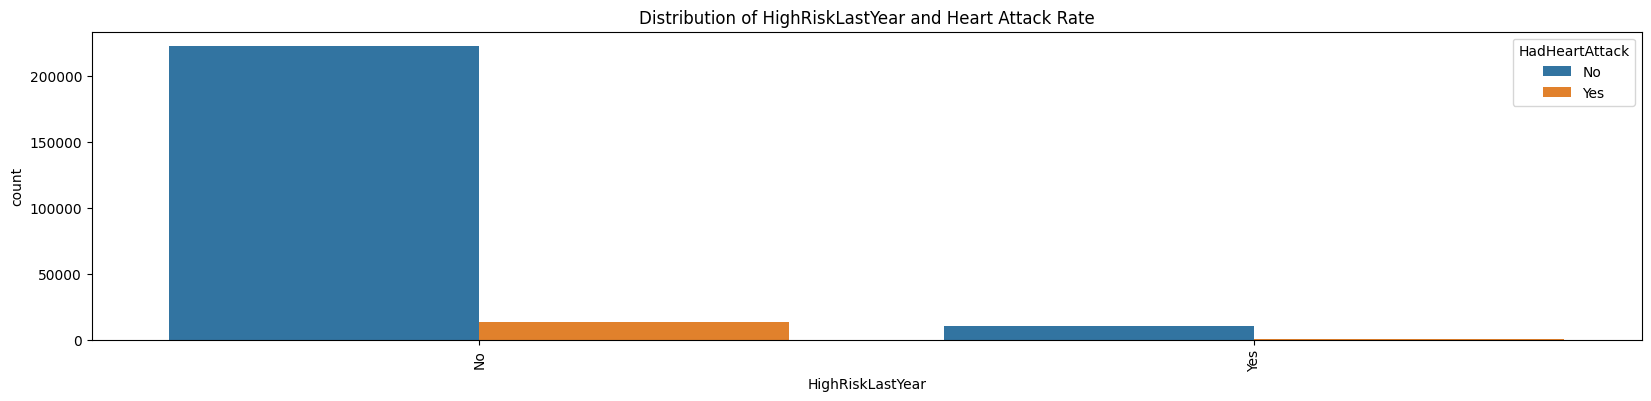

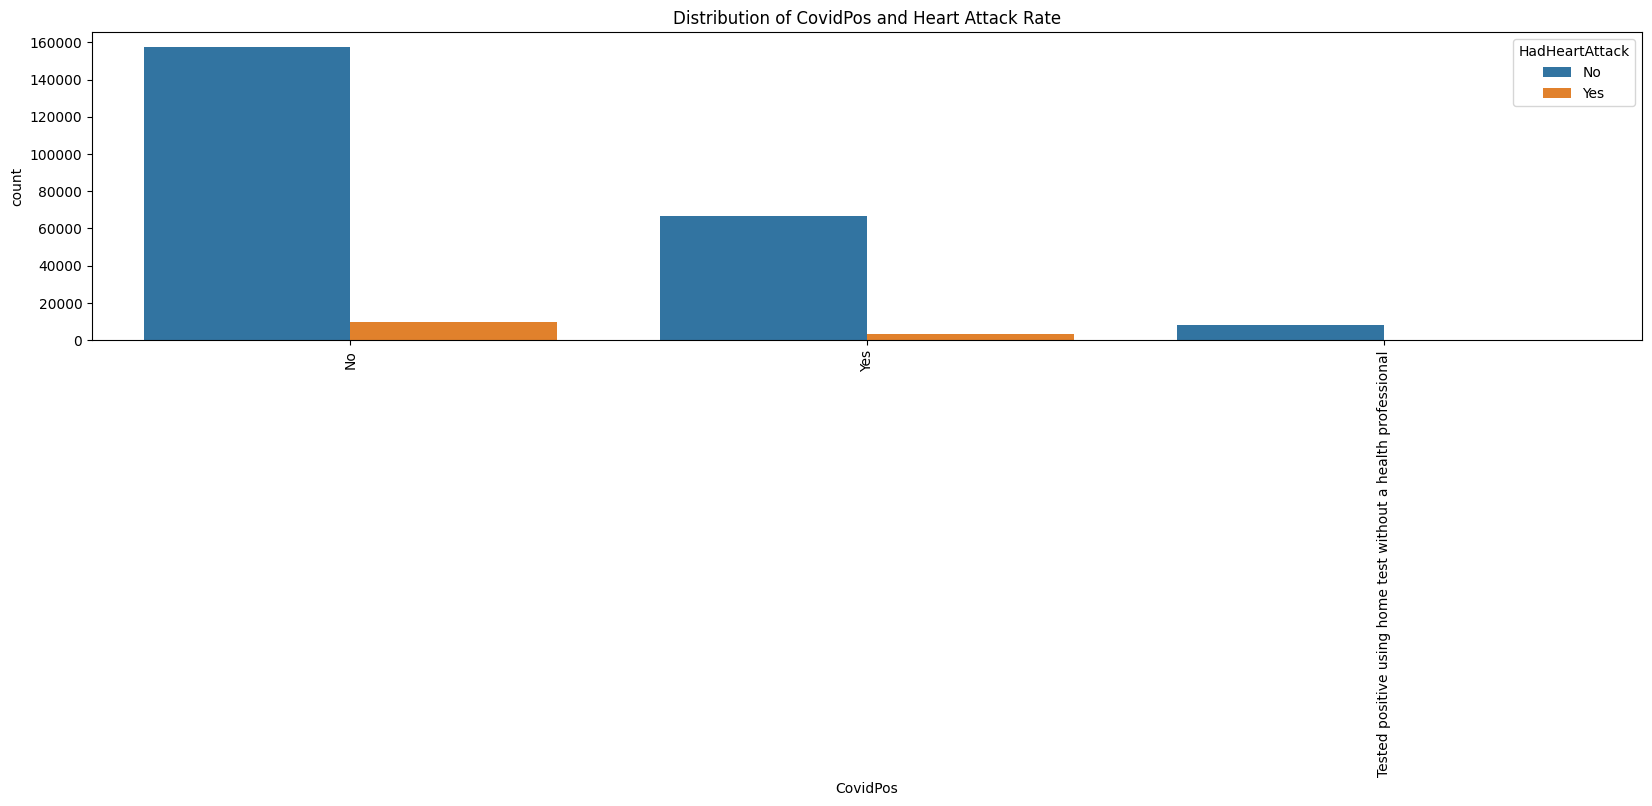

In [17]:
# Visualizing the distribution of categorical variables and their relation to heart attack
for col in categorical_columns:
    plt.figure(figsize=(20, 4))
    sns.countplot(data=df, x=col, hue="HadHeartAttack")
    plt.xticks(rotation=90)
    plt.title(f"Distribution of {col} and Heart Attack Rate")
    plt.show()

# Data Preprocessing


In [18]:
df["HadHeartAttack"] = df["HadHeartAttack"].map({"Yes": 1, "No": 0})

In [19]:
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

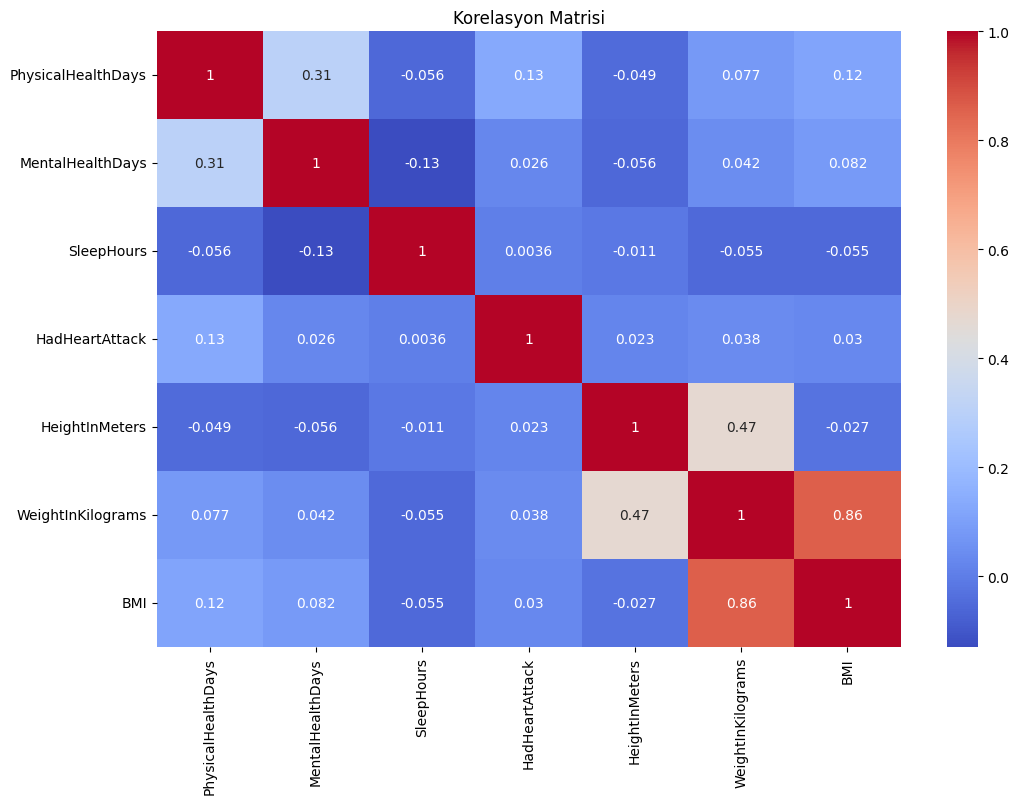

In [20]:
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Korelasyon Matrisi")
plt.show()

Since the correlation between "WeightInKilograms" and "BMI" is 0.86, which indicates a strong linear relationship, keeping both would introduce multicollinearity. Therefore, only "BMI" is retained as it is a more comprehensive indicator of body composition.

In [21]:
df.drop("WeightInKilograms", axis=1, inplace=True)

In [22]:
# Encoding Categorical Variables

# Label Encode binary categorical variables
binary_columns = [col for col in df.columns if df[col].nunique() == 2]
le = LabelEncoder()
for col in binary_columns:
    df[col] = le.fit_transform(df[col])

# One-Hot Encode multi-class categorical variables
multi_class_columns = [
    'State', 'Sex', 'GeneralHealth', 'LastCheckupTime', 'RemovedTeeth',
    'HadDiabetes', 'SmokerStatus', 'ECigaretteUsage', 'RaceEthnicityCategory',
    'AgeCategory', 'HIVTesting', 'TetanusLast10Tdap', 'CovidPos'
]

df = pd.get_dummies(df, columns=multi_class_columns, drop_first=True)

In [23]:
# Splitting the Dataset into Features and Target Variable
X = df.drop("HadHeartAttack", axis=1)
y = df["HadHeartAttack"]

# Splitting the Data into Training and Testing Sets (with stratification)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
# Scaling features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data and transform
X_test_scaled = scaler.transform(X_test)        # Transform test data

# Supervised Learning Algorithms

In [25]:
# Sampling 30% of the Data and Quick Random Forest Model Training

df_sampled = df.sample(frac=0.3, random_state=42)  # Use 30% of the data

# Defining features and target variable
X = df_sampled.drop("HadHeartAttack", axis=1)
y = df_sampled["HadHeartAttack"]

# Training a quick Random Forest model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     46516
           1       0.00      0.00      0.00      2687

    accuracy                           0.95     49203
   macro avg       0.47      0.50      0.49     49203
weighted avg       0.89      0.95      0.92     49203



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* The model performs excellently in identifying class 0 (No Heart Attack) with very high precision and recall.

* However, it fails completely to detect the positive class (HadHeartAttack = 1), with zero precision, recall, and F1-score. This indicates a severe class imbalance or model bias.

* Accuracy looks high (95%) but is misleading due to the imbalance — the model mostly predicts the majority class.

* To improve, consider techniques such as balancing the dataset (e.g., oversampling, SMOTE), tuning the model, or trying algorithms better suited for imbalanced data.

In [33]:
# Features and target
X = df.drop("HadHeartAttack", axis=1)
y = df["HadHeartAttack"]

# Model initialization and training
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Prediction and evaluation
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     46516
           1       0.56      0.24      0.34      2687

    accuracy                           0.95     49203
   macro avg       0.76      0.62      0.66     49203
weighted avg       0.94      0.95      0.94     49203



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* Logistic Regression shows strong performance on the majority class (No Heart Attack), with high precision, recall, and F1-score.

* For the minority class (HadHeartAttack = 1), it improves over Random Forest by correctly identifying more positive cases (recall = 0.24), but still struggles (precision = 0.56, F1 = 0.34).

* Accuracy remains high (95%), but the model is better balanced and less biased than Random Forest.

* To further enhance minority class detection, consider class balancing methods or adjusting decision thresholds.

In [34]:
# Features and target
X = df.drop("HadHeartAttack", axis=1)
y = df["HadHeartAttack"]

# Model initialization and training
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Prediction and evaluation
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     46516
           1       0.43      0.04      0.07      2687

    accuracy                           0.94     49203
   macro avg       0.69      0.52      0.52     49203
weighted avg       0.92      0.94      0.92     49203



* The model predicts the majority class (No Heart Attack) very well, with high precision and perfect recall.

* However, for the minority class (HadHeartAttack = 1), the recall is very low (0.04), meaning it misses most of the positive cases.

* Precision for the minority class is moderate (0.43), but due to very low recall, the overall F1-score is poor (0.07).

* Overall accuracy is high (94%), but again this is misleading because of class imbalance.

* KNN may struggle with imbalanced data and high dimensionality; consider balancing the dataset or trying other classifiers.

In [35]:
# Clean column names by replacing non-alphanumeric characters with underscores
df.columns = [re.sub(r'[^\w]', '_', col) for col in df.columns]

# Sample 30% of the data (optional, to reduce computation time)
df_sampled = df.sample(frac=0.3, random_state=42)

# Define features and target variable
X = df_sampled.drop("HadHeartAttack", axis=1)
y = df_sampled["HadHeartAttack"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the LightGBM model
model_lgbm = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model_lgbm.fit(X_train, y_train)

# Predict and print classification report
y_pred_lgbm = model_lgbm.predict(X_test)
print(classification_report(y_test, y_pred_lgbm))


[LightGBM] [Info] Number of positive: 3206, number of negative: 55837
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 59043, number of used features: 120
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.054299 -> initscore=-2.857413
[LightGBM] [Info] Start training from score -2.857413
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

* LightGBM performs very well on the majority class (No Heart Attack) with high precision and recall.

* For the minority class (HadHeartAttack = 1), it shows improvement over KNN and Random Forest by achieving better precision (0.61) and recall (0.22), though recall remains relatively low.

* The model balances overall accuracy and minority class detection better than many others here.

* Still, there is room for improvement in recall for the positive class, which is critical in medical diagnosis scenarios.

* Tuning hyperparameters, balancing the dataset, or using ensemble techniques could further enhance minority class prediction.

# General Evaluation of the Four Classification Models
We evaluated four supervised learning models — Random Forest, Logistic Regression, K-Nearest Neighbors (KNN), and LightGBM — for predicting heart attack occurrence (HadHeartAttack). All models showed high overall accuracy (~94-95%), mainly due to the large imbalance between the majority (no heart attack) and minority (heart attack) classes.

1. Random Forest had excellent performance on the majority class but failed completely to identify any positive cases, making it unsuitable for this medical classification task where detecting heart attacks is critical.

2. Logistic Regression improved detection of the minority class compared to Random Forest, with moderate precision (0.56) but low recall (0.24). This means it identified some heart attack cases but missed many others.

3. K-Nearest Neighbors (KNN) showed similar issues as Random Forest, with very low recall (0.04) on the positive class, meaning it almost never correctly detected heart attack cases despite decent precision.

4. LightGBM offered the best balance between identifying both classes, achieving the highest precision (0.61) and recall (0.22) for the minority class, while maintaining high accuracy and performance on the majority class.

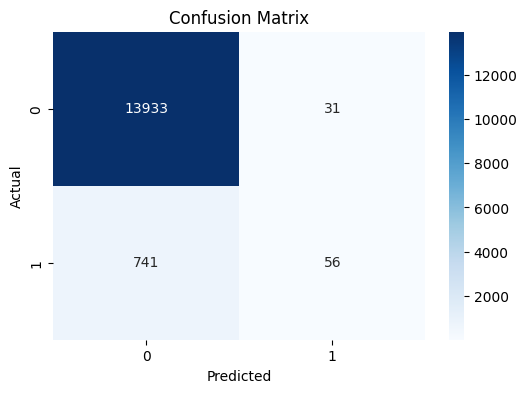

Classification Report:

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     13964
           1       0.64      0.07      0.13       797

    accuracy                           0.95     14761
   macro avg       0.80      0.53      0.55     14761
weighted avg       0.93      0.95      0.93     14761



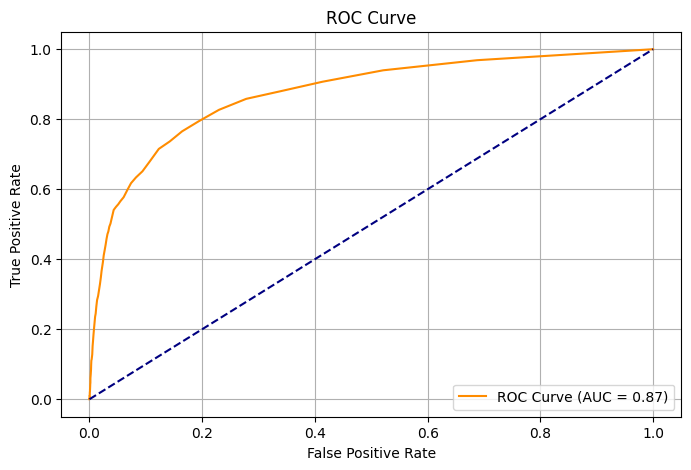

In [36]:
# Model Initialization and Training
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Prediction
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# ROC Curve and AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [42]:
# Sample 30% of the training data to reduce computation time
X_train_sample = X_train.sample(frac=0.3, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

# Define hyperparameter distributions for RandomizedSearch
param_dist = {
    'n_estimators': randint(50, 200),      # Number of trees in the forest
    'max_depth': [5, 10, None],            # Maximum depth of the tree
    'min_samples_split': randint(2, 11)    # Minimum number of samples to split a node
}

# Setup RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10,            # Number of parameter settings sampled
    cv=5,                 # 5-fold cross-validation
    scoring='f1',         # Use F1-score for evaluation
    n_jobs=-1,            # Use all processors
    verbose=1,            # Print progress
    random_state=42
)

# Train models with different hyperparameter combinations
random_search.fit(X_train_sample, y_train_sample)

# Output the best hyperparameters found
print("Best Parameters:", random_search.best_params_)

# Use the best model to predict on the test set
best_rf = random_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

# Print classification report for evaluation
print(classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 4, 'n_estimators': 124}
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     13964
           1       0.64      0.05      0.09       797

    accuracy                           0.95     14761
   macro avg       0.79      0.52      0.53     14761
weighted avg       0.93      0.95      0.93     14761



# Hyperparameter Optimization and Model Evaluation of Random Forest Classifier
In this study, hyperparameter optimization for the Random Forest classifier was performed using RandomizedSearchCV on a 30% sample of the training data to reduce computational cost. The search space included the number of trees (n_estimators), maximum tree depth (max_depth), and minimum samples required to split an internal node (min_samples_split). The optimization was conducted with 5-fold cross-validation, evaluating models based on the F1-score.

The best hyperparameters identified were:

max_depth: None (unlimited tree depth)

min_samples_split: 4

n_estimators: 124

The optimized model was then evaluated on the test set, yielding the following performance metrics:

For the negative class (label 0), precision was 0.95, recall was 1.00, and the F1-score was 0.97, indicating excellent classification of the majority class.

For the positive class (label 1), precision was 0.64, recall was 0.05, and the F1-score was 0.09, demonstrating poor sensitivity to the minority class.

Overall accuracy was 0.95; however, due to class imbalance, this metric may be misleading.

While the model successfully identifies the majority class with high accuracy, its ability to detect the minority class (patients who experienced a heart attack) remains insufficient. This limitation highlights the challenges posed by imbalanced datasets in classification tasks. To improve minority class detection, further strategies such as resampling techniques, alternative algorithms, or class weight adjustments should be considered.

# Unsupervised Learning: PCA and K-Means Clustering
This process falls under unsupervised learning because it does not use any labeled target variable (y) and relies solely on the features (X). The clusters are formed based on similarities within the data without predefined classes. The goal is to explore the data structure and reveal hidden patterns.

**In summary:**
PCA combined with K-Means clustering is an unsupervised learning technique.

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


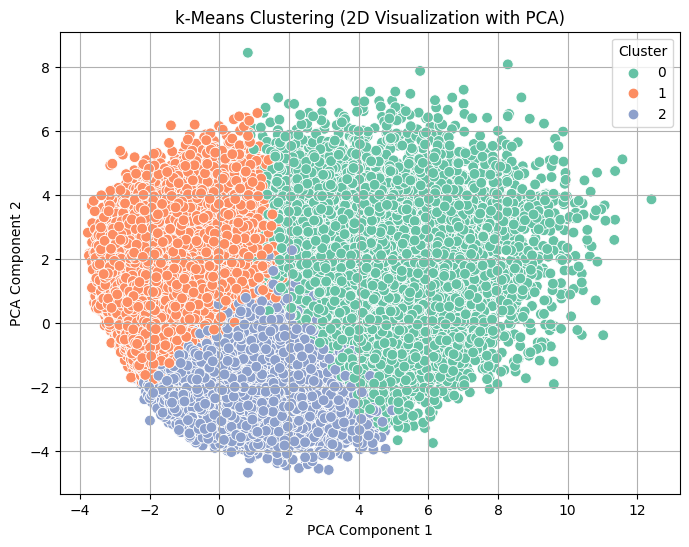

         PhysicalHealthDays  MentalHealthDays  PhysicalActivities  SleepHours  \
Cluster                                                                         
0                 17.840622         11.705940            0.428634    6.750109   
1                  1.956709          4.129183            0.850020    6.905921   
2                  2.418580          1.668441            0.795400    7.283024   

         HadAngina  HadStroke  HadAsthma  HadSkinCancer   HadCOPD  \
Cluster                                                             
0         0.191471   0.157963   0.317232       0.094756  0.318538   
1         0.006597   0.007763   0.130295       0.020188  0.015817   
2         0.093163   0.047865   0.120296       0.174824  0.080954   

         HadDepressiveDisorder  ...  AgeCategory_Age_65_to_69  \
Cluster                         ...                             
0                     0.514578  ...                  0.126414   
1                     0.186276  ...                  

In [46]:
# Unsupervised Learning: PCA and K-Means Clustering
# This process is an unsupervised learning method because it does not use any labeled target variable (y).
# Clusters are formed based on data similarities without predefined classes.
# The goal is to explore data structure and reveal hidden patterns.

X_scaled = scaler.fit_transform(X)  # Scale features without using target variable

# Dimensionality reduction with PCA for visualization (2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Plotting the clusters in 2D PCA space
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2', s=60)
plt.title("k-Means Clustering (2D Visualization with PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid()
plt.show()

# Creating a DataFrame with cluster labels
X_df = pd.DataFrame(X, columns=X.columns)
X_df['Cluster'] = clusters

# Summary statistics for each cluster
cluster_summary = X_df.groupby('Cluster').mean()
print(cluster_summary)


The clustering process yielded three distinct groups, and their average health-related characteristics were analyzed. One of the key variables considered in this analysis is the presence of angina (indicative of heart attack history or severe coronary issues). The relationship between the identified clusters and angina prevalence is of particular interest.

**Cluster 0: High-Risk Group**

* This group is characterized by extremely poor physical and mental health outcomes.

* It has the highest average number of unhealthy physical (17.84 days) and mental health days (11.70 days).

* Most importantly, the prevalence of angina in this cluster is 19.1%, which is the highest among all groups.

* Additionally, this group also shows high rates of stroke (15.8%), COPD (31.8%), and depressive disorder (51.4%).

* These findings suggest that Cluster 0 is composed of individuals with serious and chronic health conditions, and most likely includes a significant portion of individuals at very high risk for heart attacks or related cardiovascular events.

**Cluster 1: Low-Risk and Healthiest Group**
* This group represents individuals with the best overall health profile among all clusters.

* PhysicalHealthDays and MentalHealthDays are low (1.95 and 4.12 respectively), and they are physically more active (PhysicalActivities: 0.85).

* Crucially, the rate of angina is only 0.66%, which is the lowest among all clusters.

* The prevalence of other cardiovascular risks such as stroke (0.77%) and COPD (1.58%) is also minimal.

* This cluster likely represents a younger, healthier population with very low cardiovascular risk.

**Cluster 2: Moderate-Risk Group with Elderly Population**
* This cluster has moderate health metrics but an older age composition, with many members aged 70 and above.

* The angina rate is 9.3%, which is notably higher than Cluster 1 but lower than Cluster 0.

* While physical and mental health days are relatively better than Cluster 0, chronic conditions such as skin cancer (17.5%) and stroke (4.7%) are more prevalent.

* The higher angina prevalence compared to Cluster 1 may be attributable to age, as aging is a well-established risk factor for cardiovascular diseases.



# Heart Attack Risk - Variable Analysis
The following variables have been analyzed for their potential impact on heart attack risk. Based on the latest findings, factors such as age, prior heart conditions, smoking status, diabetes, and physical activity levels remain the strongest predictors. It is recommended to focus on lifestyle modifications, regular health screenings, and targeted interventions for high-risk groups to effectively reduce heart attack incidence.

1. State
* Description: The state where the participant lives.
* Effect: Geographic location, access to healthcare services, and lifestyle differences can affect heart attack risk.

2. Sex
* Description: The participant’s gender.
* Effect: Men generally have a higher risk of heart attack; however, risk factors also exist for women.

3. GeneralHealth
* Description: The individual’s overall health status.
* Effect: Poor general health can increase the risk of heart attack.

4. PhysicalHealthDays
* Description: Number of days in the past 30 days with physical health problems.
* Effect: A high number of physically unhealthy days may increase heart attack risk.

5. MentalHealthDays
* Description: Number of days in the past 30 days with mental health problems.
* Effect: Mental health issues such as stress and depression can elevate heart attack risk.

6. LastCheckupTime
* Description: Time since the individual’s last health checkup.
* Effect: Regular health checkups are important for early diagnosis and prevention.

7. PhysicalActivities
* Description: Level of physical activity of the individual.
* Effect: Regular physical activity can reduce heart attack risk.

8. SleepHours
* Description: Average daily hours of sleep.
* Effect: Both insufficient and excessive sleep can negatively impact heart health.

9. RemovedTeeth
* Description: Number of teeth extracted.
* Effect: Oral health is linked to overall health; tooth loss may be associated with heart diseases.

10. HadHeartAttack
* Description: Whether the individual has had a heart attack before.
* Effect: A previous heart attack indicates a higher risk for future events.

11. HadAngina
* Description: History of chest pain (angina).
* Effect: Angina can be a sign of underlying heart disease.

12. HadStroke
* Description: Whether the individual has had a stroke.
* Effect: Stroke history is an indicator of cardiovascular risk.

13. HadAsthma
* Description: Whether the individual has asthma.
* Effect: Asthma may indirectly affect heart health.

14. HadSkinCancer
* Description: History of skin cancer.
* Effect: No direct relationship with heart attack risk.

15. HadCOPD
* Description: Whether the individual has Chronic Obstructive Pulmonary Disease (COPD).
* Effect: COPD can increase the risk of heart disease.

16. HadDepressiveDisorder
* Description: Whether the individual has been diagnosed with depression.
* Effect: Depression is a known factor that increases heart attack risk.

17. HadKidneyDisease
* Description: History of kidney disease.
* Effect: Kidney disease adversely affects heart health.

18. HadArthritis
* Description: Whether the individual has arthritis.
* Effect: Arthritis can affect heart health through inflammation.

19. HadDiabetes
* Description: Whether the individual has diabetes.
* Effect: Diabetes significantly increases heart attack risk.

20. DeafOrHardOfHearing
* Description: Hearing impairment status.
* Effect: No direct relationship with heart attack risk.

21. BlindOrVisionDifficulty
* Description: Vision impairment status.
* Effect: No direct relationship with heart attack risk.

22. DifficultyConcentrating
* Description: Whether the individual experiences concentration difficulties.
* Effect: May indicate mental health issues affecting heart risk.

23. DifficultyWalking
* Description: Whether the individual has difficulty walking.
* Effect: Limits physical activity, impacting heart health.

24. DifficultyDressingBathing
* Description: Difficulty in daily activities such as dressing or bathing.
* Effect: Indicator of overall health status.

25. DifficultyErrands
* Description: Difficulty performing daily errands.
* Effect: Reflects general health condition.

26. SmokerStatus
* Description: Smoking status.
* Effect: Smoking greatly increases heart attack risk.

27. ECigaretteUsage
* Description: Usage of electronic cigarettes.
* Effect: Electronic cigarette use may have adverse effects on heart health.

28. ChestScan
* Description: Whether the individual has undergone chest imaging (e.g., CT scan, X-ray).
* Effect: Important for early detection of heart and lung issues; may indirectly indicate higher risk.

29. RaceEthnicityCategory
* Description: Individual’s racial or ethnic category.
* Effect: Certain groups may have higher heart attack risks due to genetic and socioeconomic factors.

30. AgeCategory
* Description: Age group of the individual.
* Effect: Risk increases significantly with age; one of the most critical variables.

31. HeightInMeters
* Description: Height in meters.
* Effect: Not directly impactful but used in BMI calculation; indirect effect possible.

32. WeightInKilograms
* Description: Weight in kilograms.
* Effect: Excess weight, especially obesity, increases heart attack risk; should be evaluated with BMI.

33. BMI
* Description: Body Mass Index (weight/(height²)).
* Effect: High BMI (particularly >30) significantly raises heart attack risk.

34. AlcoholDrinkers
* Description: Alcohol consumption status.
* Effect: Excessive alcohol intake raises heart disease risk; effects of moderate consumption are debated.

35. HIVTesting
* Description: Whether the individual has been tested for HIV.
* Effect: HIV-positive individuals have higher cardiovascular risks; testing may indicate healthcare engagement.

36. FluVaxLast12
* Description: Whether the individual received a flu vaccine in the past 12 months.
* Effect: Indicates preventive healthcare behavior, potentially linked to lower risk.

37. PneumoVaxEver
* Description: Whether the individual has ever received a pneumococcal vaccine.
* Effect: Vaccination rates may be higher in individuals with chronic conditions, indirectly signaling higher risk.

38. TetanusLast10Tdap
* Description: Tetanus vaccination status in the last 10 years.
* Effect: No direct connection to heart attack risk; may indicate healthcare access.

39. HighRiskLastYear
* Description: Whether the individual considered themselves or was classified as high risk in the past year.
* Effect: One of the strongest indicators of elevated heart attack risk.

40. CovidPos
* Description: Whether the individual tested positive for Covid-19.
* Effect: Covid-19 can cause cardiovascular damage, increasing subsequent heart attack risk.